# Machine Learning and Content Analytics – Mini Project

# Offensive language and hate speech detection 
---
> Students: `Arkoumani Georgia - p2822104` `Poulou Myrto - p2822129` `Koutsodimitropoulou Anastasia - p2822119` `Zaragka Eftychia - p2822112` <br />
> Professor: Haris Papageorgiou (xaris@ilsp.gr) <br />
> Assistant responsible for this assignment: George Perakis (gperakis@aueb.gr) <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> Date: 28/08/2022


## Introduction

Hate speech can have many forms of expressions which advocate, incite, promote or justify hatred, violence and discrimination against a specific person or group with a variety of reasons.
At UC Berkeley’s D-Lab, for some years now, a hate speech measurement project has began in early 2017 providing their assumptions & datasets to the public.

A part of this project's dataset, contain data from a public release of Berkeley Institute. The corresponding dataset consists of `39,565` comments annotated by `7,912` annotators, for `135,556` combined rows. The target variable corresponds to **`hate speech score`** but there are,also, other related variables (such as: sentiment, (dis)respect, insult, humiliation, inferior status, violence, dehumanization, genocide, attack/defense, hate speech benchmark) which could be treated as outcomes. In the mentioned research `8` target identity groups (race/ethnicity, religion, national origin/citizenship, gender, sexual orientation, age, disability, political ideology) are participating and `42` identity subgroups. There is a variety of in use sources, such as Twitter, Youtube, Reddit etc.

This dataset is considered the 2nd larger one, which was used to create the final one of this project.

Consequently and due to existence of groups info, a further descriptive analysis will follow

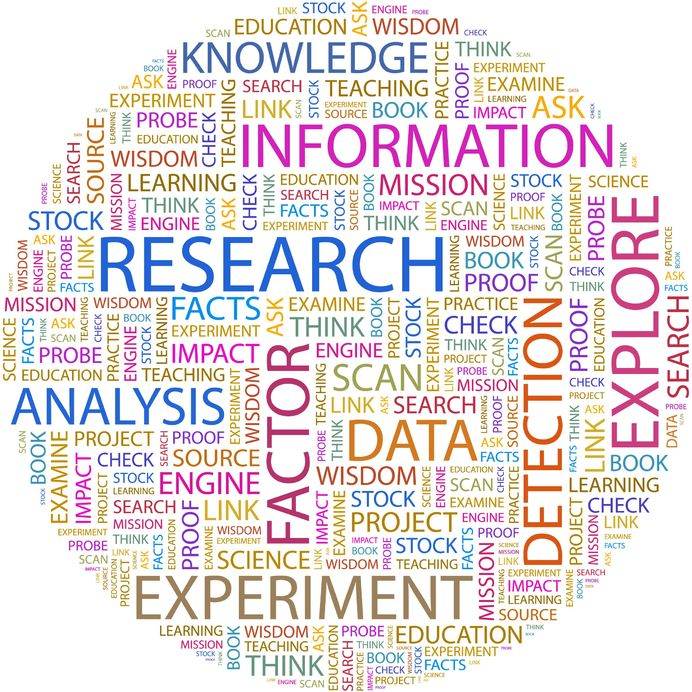

* Importing Berkeley dataset (subset of the overall one) for further analysis

In [ ]:
import warnings
# Ignore future warning in order not to interrupt the flow
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#!pip install datasets

In [ ]:
import datasets
#Loading the dataset from "HuggingFace Hub"
dataset = datasets.load_dataset('ucberkeley-dlab/measuring-hate-speech', 'binary')   
berkeley_df = dataset['train'].to_pandas()
# initial statistical metrics from the downloaded dataset
berkeley_df.describe()

Using custom data configuration ucberkeley-dlab--measuring-hate-speech-1d47093687320b66
Reusing dataset parquet (C:\Users\LENOVO\.cache\huggingface\datasets\ucberkeley-dlab___parquet\ucberkeley-dlab--measuring-hate-speech-1d47093687320b66\0.0.0\0b6d5799bb726b24ad7fc7be720c170d8e497f575d02d47537de9a5bac074901)


  0%|          | 0/1 [00:00<?, ?it/s]

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,hatespeech,hate_speech_score,infitms,outfitms,annotator_severity,std_err,annotator_infitms,annotator_outfitms,hypothesis,annotator_age
count,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.00000,135556.000000,135556.000000,135556.000000,135556.000000,...,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135451.000000
mean,23530.416138,5567.097812,1.281352,2.954307,2.828875,2.56331,2.278638,2.698575,1.846211,1.052045,...,0.744733,-0.567428,1.034322,1.001052,-0.018817,0.300588,1.007158,1.011841,0.014589,37.910772
std,12387.194125,3230.508937,1.023542,1.231552,1.309548,1.38983,1.370876,0.898500,1.402372,1.345706,...,0.932260,2.380003,0.496867,0.791943,0.487261,0.236380,0.269876,0.675863,0.613006,11.641276
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.340000,0.100000,0.070000,-1.820000,0.020000,0.390000,0.280000,-1.578693,18.000000
25%,18148.000000,2719.000000,0.000000,2.000000,2.000000,2.00000,1.000000,2.000000,1.000000,0.000000,...,0.000000,-2.330000,0.710000,0.560000,-0.380000,0.030000,0.810000,0.670000,-0.341008,29.000000
50%,20052.000000,5602.500000,1.000000,3.000000,3.000000,3.00000,3.000000,3.000000,2.000000,0.000000,...,0.000000,-0.340000,0.960000,0.830000,-0.020000,0.340000,0.970000,0.850000,0.110405,35.000000
75%,32038.250000,8363.000000,2.000000,4.000000,4.000000,4.00000,3.000000,3.000000,3.000000,2.000000,...,2.000000,1.410000,1.300000,1.220000,0.350000,0.420000,1.170000,1.130000,0.449555,45.000000
max,50070.000000,11142.000000,3.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,...,2.000000,6.300000,5.900000,9.000000,1.360000,1.900000,2.010000,9.000000,0.987511,81.000000


* Importing useful libraries for the following analysis

In [ ]:
import pandas as pd
import numpy as np
import random
import os
import time 
import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats.stats as stats

### Data Analysis

In [ ]:
#Taking a glimpse of the dataset
berkeley_df.head(10)

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,47101,3379,3,4.0,4.0,4.0,4.0,4.0,4.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,43625,7365,3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,12538,488,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False
5,11001,527,0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False
6,13168,3275,0,4.0,4.0,4.0,4.0,3.0,3.0,0.0,...,False,False,False,False,False,False,False,False,True,False
7,17034,6801,0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
8,40171,10363,3,4.0,4.0,4.0,3.0,3.0,3.0,0.0,...,False,False,False,False,False,False,False,False,True,False
9,1006,10615,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
#Exploring the available information
berkeley_df.columns

Index(['comment_id', 'annotator_id', 'platform', 'sentiment', 'respect',
       'insult', 'humiliate', 'status', 'dehumanize', 'violence',
       ...
       'annotator_religion_hindu', 'annotator_religion_jewish',
       'annotator_religion_mormon', 'annotator_religion_muslim',
       'annotator_religion_nothing', 'annotator_religion_other',
       'annotator_sexuality_bisexual', 'annotator_sexuality_gay',
       'annotator_sexuality_straight', 'annotator_sexuality_other'],
      dtype='object', length=131)

In [ ]:
#Viewing dataset structure
berkeley_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135556 entries, 0 to 135555
Columns: 131 entries, comment_id to annotator_sexuality_other
dtypes: bool(103), float64(19), int32(2), int8(1), object(6)
memory usage: 40.3+ MB


* Detecting missing values & duplicated information

In [ ]:
#At the same time it is important to test the possible existence of missing values
print("Are there any Missing values?" , berkeley_df.isnull().values.any()) 
# It seems that in berkeley dataset there are values missing.

Are there any Missing values? True


* Pointing out the location of the missing data

In [ ]:
#Detecting in which columns the null values are located
berkeley_df.columns[berkeley_df.isna().any()].tolist()

['annotator_educ', 'annotator_income', 'annotator_ideology', 'annotator_age']

<u> **`Assumption:`** </u>
   * Personal information of the involved annotators seem to be missing

In [ ]:
#Calculating the total count of missing values per variable
print(berkeley_df['annotator_educ'].isna().sum())
print(berkeley_df['annotator_income'].isna().sum())
print(berkeley_df['annotator_ideology'].isna().sum())
print(berkeley_df['annotator_age'].isna().sum())

17
103
27
105


* Searching for any possible patterns/ combinations

In [ ]:
berkeley_df['annotator_educ'].isna().sum() & berkeley_df['annotator_income'].isna().sum()& berkeley_df['annotator_ideology'].isna().sum() & berkeley_df['annotator_age'].isna().sum()

1

In [ ]:
berkeley_df['annotator_income'].isna().sum() & berkeley_df['annotator_age'].isna().sum()

97

In [ ]:
berkeley_df['annotator_ideology'].isna().sum() & berkeley_df['annotator_age'].isna().sum()

9

In [ ]:
berkeley_df['annotator_ideology'].isna().sum() & berkeley_df['annotator_income'].isna().sum()

3

In [ ]:
berkeley_df['annotator_ideology'].isna().sum() & berkeley_df['annotator_educ'].isna().sum()

17

<u>**`Main Assumption`**</u>: No specific patterns seem to exist. However, what can be concluded is that someone would more likely hidden his/her income details rather than his/ her age, ideology or education.

In [ ]:
#Check for duplicates
berkeley_df.duplicated(keep=False).sum()

0

In [ ]:
#Check for duplicates
berkeley_df['text'].duplicated(keep=False).sum()

125479

In [ ]:
# Descriptives for numeric variables
berkeley_df.describe(include=[np.number])

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,hatespeech,hate_speech_score,infitms,outfitms,annotator_severity,std_err,annotator_infitms,annotator_outfitms,hypothesis,annotator_age
count,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.00000,135556.000000,135556.000000,135556.000000,135556.000000,...,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135451.000000
mean,23530.416138,5567.097812,1.281352,2.954307,2.828875,2.56331,2.278638,2.698575,1.846211,1.052045,...,0.744733,-0.567428,1.034322,1.001052,-0.018817,0.300588,1.007158,1.011841,0.014589,37.910772
std,12387.194125,3230.508937,1.023542,1.231552,1.309548,1.38983,1.370876,0.898500,1.402372,1.345706,...,0.932260,2.380003,0.496867,0.791943,0.487261,0.236380,0.269876,0.675863,0.613006,11.641276
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.340000,0.100000,0.070000,-1.820000,0.020000,0.390000,0.280000,-1.578693,18.000000
25%,18148.000000,2719.000000,0.000000,2.000000,2.000000,2.00000,1.000000,2.000000,1.000000,0.000000,...,0.000000,-2.330000,0.710000,0.560000,-0.380000,0.030000,0.810000,0.670000,-0.341008,29.000000
50%,20052.000000,5602.500000,1.000000,3.000000,3.000000,3.00000,3.000000,3.000000,2.000000,0.000000,...,0.000000,-0.340000,0.960000,0.830000,-0.020000,0.340000,0.970000,0.850000,0.110405,35.000000
75%,32038.250000,8363.000000,2.000000,4.000000,4.000000,4.00000,3.000000,3.000000,3.000000,2.000000,...,2.000000,1.410000,1.300000,1.220000,0.350000,0.420000,1.170000,1.130000,0.449555,45.000000
max,50070.000000,11142.000000,3.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,...,2.000000,6.300000,5.900000,9.000000,1.360000,1.900000,2.010000,9.000000,0.987511,81.000000


In [ ]:
# Identifying an extra statistical metric for the reported age info
berkeley_df['annotator_age'].median()

35.0

<u>**`Key Points`**</u>: 

> **`Sentiment:`** reflects the emotional depth in a piece of text. In this case we have an ordinal score where 0 represents the absence of emotions while 4 depicts a comment with high emotional impact. The average score is approximate to 3 indicating a context of comments, quite high in emotional depth.  <br />
<br />
> **`Insult:`**  Comments with relevant framework seem to contain high levels of insults <br />
<br />
> **`Humiliate:`** Motivations for humiliation seem to be relatively moderate <br />
<br />
> **`Dehumanize & violence:`** No intetions of extreme expressions either inhumane or violent seem to exist <br />
<br />
> **`Hatespeech:`** The corresponding score reveal that direct hateful comments do not dominate  <br />
<br />
> **`Hatespeech score:`** The average prediction of a probable hate speech score to a new shown comment appears to be close to 0, namely a future comment in social media is more likely to have no content of hatefulness. <br />
<br />
> **`Annotator age:`**  The people behind the comments' categorazation is around 37. The deviation between the mean & median value of age depict that the involved annotators do not belong to a specific age group. <br />

* Graphical represantation

In [ ]:
color = dict(boxes='green', whiskers='orange', medians='blue', caps='Gray')

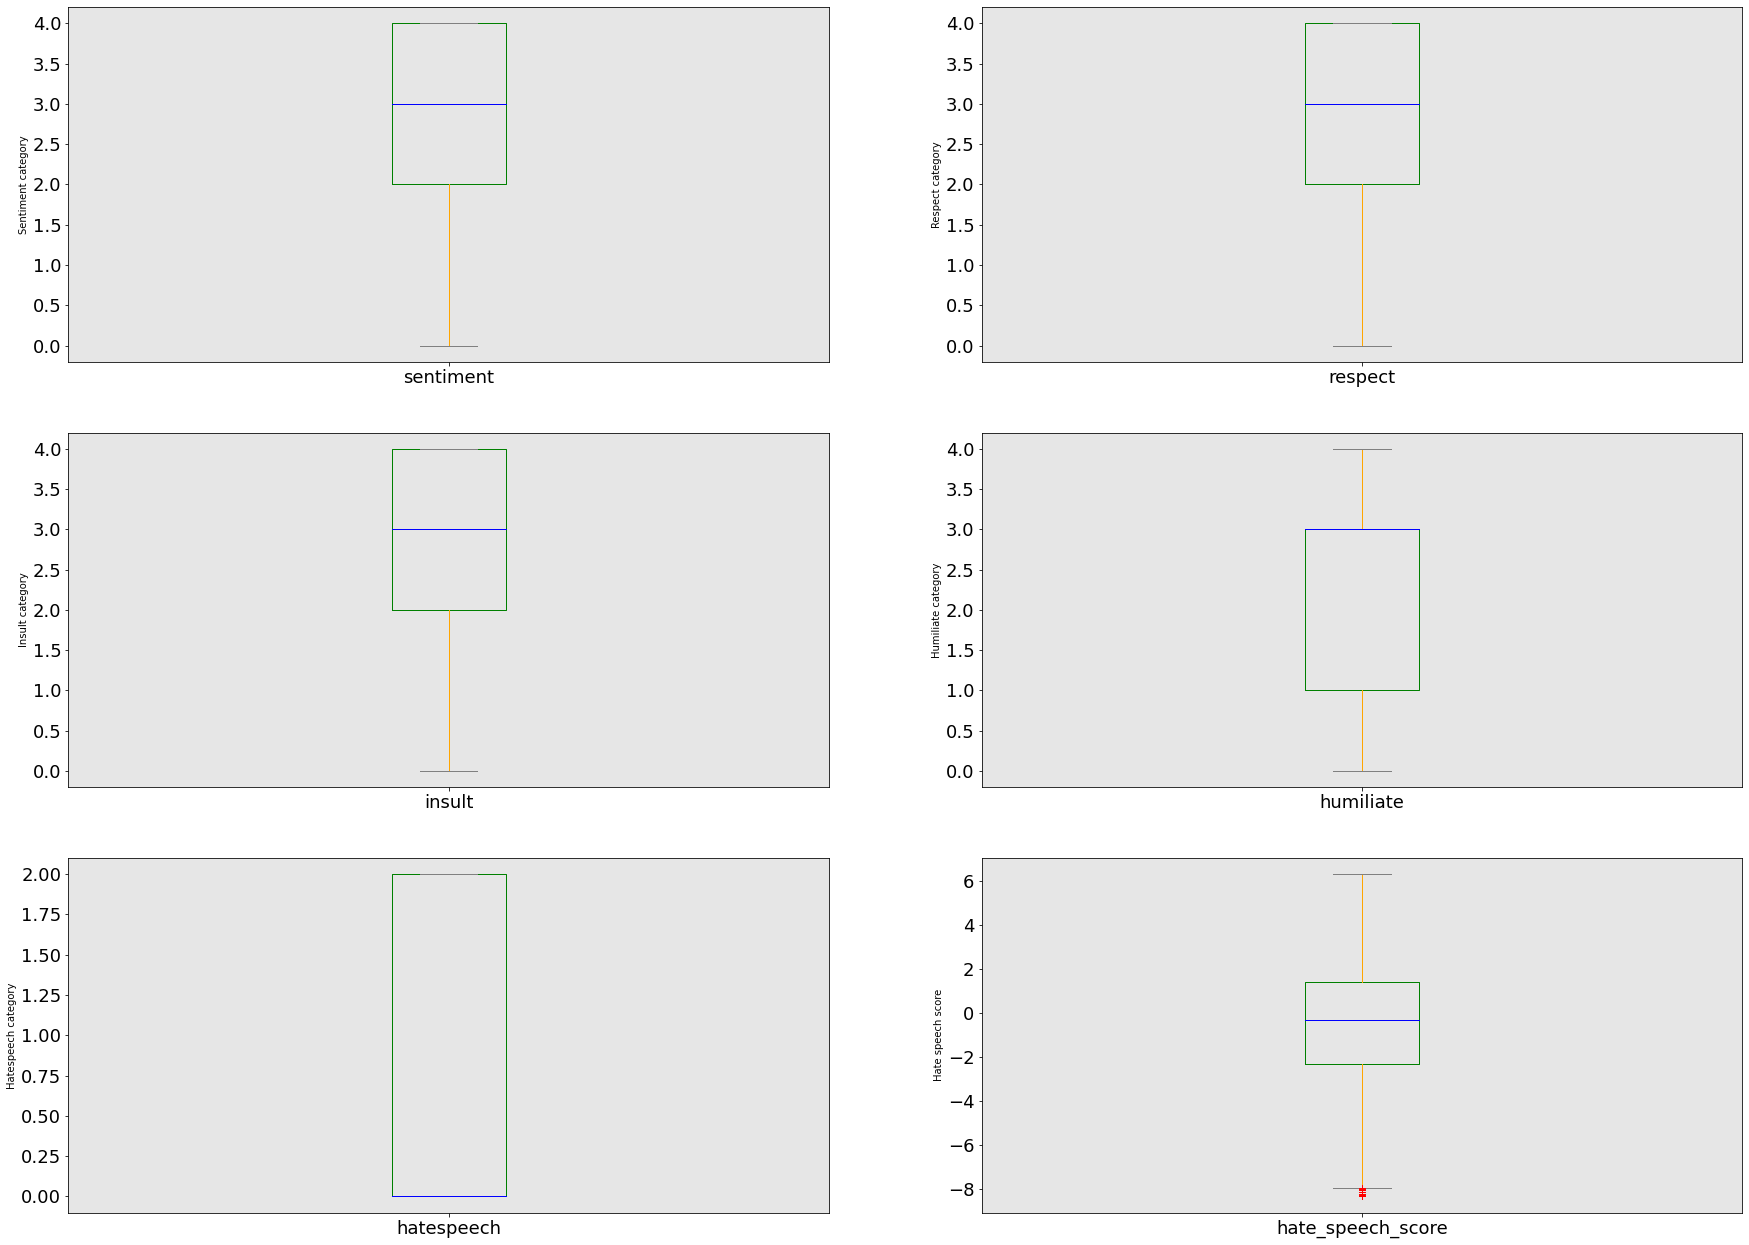

In [ ]:
plt.figure(figsize=(30,30))

plt.subplot(4, 2, 1)
fig = berkeley_df.boxplot(column='sentiment', color=color, sym="r+", grid=False, fontsize=18)
fig.set_title('')
fig.set_ylabel('Sentiment category')
fig.set_facecolor('#E6E6E6')

plt.subplot(4, 2, 2)
fig = berkeley_df.boxplot(column='respect', color=color, sym="r+", grid=False, fontsize=18)
fig.set_title('')
fig.set_ylabel('Respect category')
fig.set_facecolor('#E6E6E6')

plt.subplot(4, 2, 3)
fig = berkeley_df.boxplot(column='insult', color=color, sym="r+",grid=False, fontsize=18)
fig.set_title('')
fig.set_ylabel('Insult category')
fig.set_facecolor('#E6E6E6')

plt.subplot(4, 2, 4)
fig = berkeley_df.boxplot(column='humiliate', color=color, sym="r+", grid=False, fontsize=18)
fig.set_title('')
fig.set_ylabel('Humiliate category')
fig.set_facecolor('#E6E6E6')


plt.subplot(4, 2, 5)
fig = berkeley_df.boxplot(column='hatespeech', color=color, sym="r+",grid=False, fontsize=18)
fig.set_title('')
fig.set_ylabel('Hatespeech category')
fig.set_facecolor('#E6E6E6')

plt.subplot(4, 2, 6)
fig = berkeley_df.boxplot(column='hate_speech_score', color=color, sym="r+",grid=False, fontsize=18)
fig.set_title('')
fig.set_ylabel('Hate speech score')
fig.set_facecolor('#E6E6E6')

<u> **`Assumption:`** </u>
   * For the 50% of the comments and more, sentiment, insult & respect metrics are observed to have moderate to high values.
   * On the other side, humilate metric can be considered with very low levels.
   * The target metrics `hatespeech` & `hate speech score` display quite low levels of hateful comments, indicating that yes extreme hateful comments appear in the social media but not in the majority.

* Checking for outliers

In [ ]:
for col_name in berkeley_df.select_dtypes(include=np.number).columns[:]:
    print(col_name)
    #Creating relevant quantiles
    q1 = berkeley_df[col_name].quantile(0.25)
    q3 = berkeley_df[col_name].quantile(0.75)
    #Interquartile Range
    iqr = q3 - q1
    #Upper & Down bounds
    low = q1-3*iqr
    high = q3+3*iqr
    print("Outliers = ",berkeley_df.loc[(berkeley_df[col_name] < low) | (berkeley_df[col_name] > high), col_name].shape)

comment_id
Outliers =  (0,)
annotator_id
Outliers =  (0,)
platform
Outliers =  (0,)
sentiment
Outliers =  (0,)
respect
Outliers =  (0,)
insult
Outliers =  (0,)
humiliate
Outliers =  (0,)
status
Outliers =  (0,)
dehumanize
Outliers =  (0,)
violence
Outliers =  (0,)
genocide
Outliers =  (0,)
attack_defend
Outliers =  (0,)
hatespeech
Outliers =  (0,)
hate_speech_score
Outliers =  (0,)
infitms
Outliers =  (564,)
outfitms
Outliers =  (2030,)
annotator_severity
Outliers =  (0,)
std_err
Outliers =  (735,)
annotator_infitms
Outliers =  (0,)
annotator_outfitms
Outliers =  (3457,)
hypothesis
Outliers =  (0,)
annotator_age
Outliers =  (0,)


* Checking even further the hatespeech information

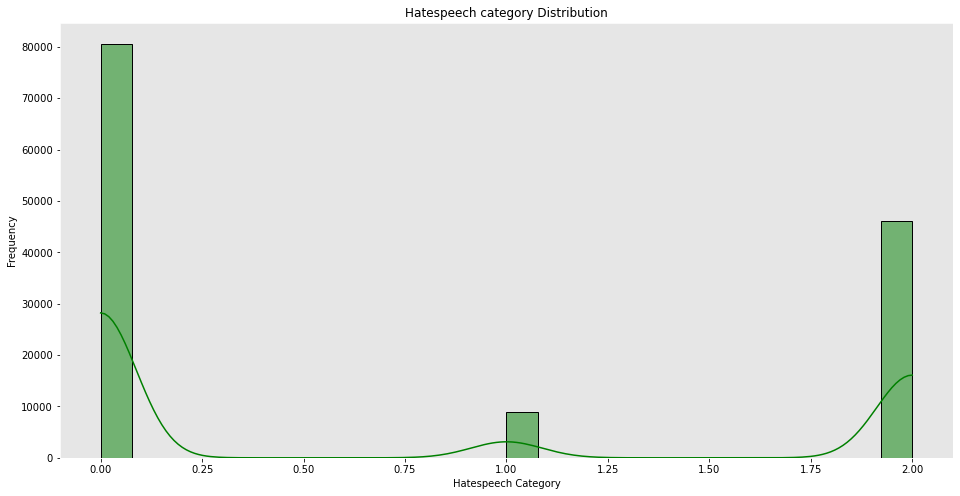

In [ ]:
fig, ax = plt.subplots(figsize = (16, 8))
# Use a gray background
ax.set_facecolor('#E6E6E6')
sns.histplot(x='hatespeech', data=berkeley_df, kde=True, color='g')
# Add title
plt.title('Hatespeech category Distribution')
# Spine color of figure
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
# Name axis labels
plt.xlabel("Hatespeech Category")
plt.ylabel("Frequency")
plt.show()

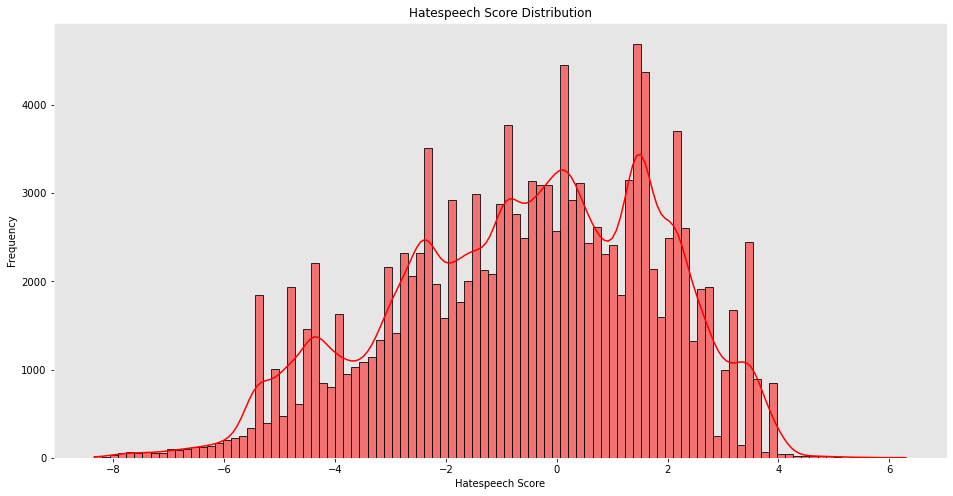

In [ ]:
fig, ax = plt.subplots(figsize = (16, 8))
# Use a gray background
ax.set_facecolor('#E6E6E6')
sns.histplot(x='hate_speech_score', data=berkeley_df, kde=True, color='r')
# Add title
plt.title('Hatespeech Score Distribution')
# Spine color of figure
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
# Name axis labels
plt.xlabel("Hatespeech Score")
plt.ylabel("Frequency")
plt.show()

## Hatespeech & Annotator Education

In [ ]:
Nominal0= berkeley_df[['annotator_educ']].value_counts().to_frame('count')
Nominal0

,count
annotator_educ,
college_grad_ba,50206
some_college,35115
college_grad_aa,18011
high_school_grad,14138
masters,12593
professional_degree,3042
phd,1562
some_high_school,872


In [ ]:
Nominal0['percentage']= round((Nominal0['count']/Nominal0['count'].sum())*100,2)
Nominal0

,count,percentage
annotator_educ,,
college_grad_ba,50206,37.04
some_college,35115,25.91
college_grad_aa,18011,13.29
high_school_grad,14138,10.43
masters,12593,9.29
professional_degree,3042,2.24
phd,1562,1.15
some_high_school,872,0.64


<u> **`Assumption:`** </u>
   * The majority of the annotators hold a college degree, while a few are high school graduates. Therefore we can conclude that Berkeley institution pays attention to which people assigns the role of an annotator

Text(0.5, 1.0, 'Annotators Education / Hatespeech score Distribution')

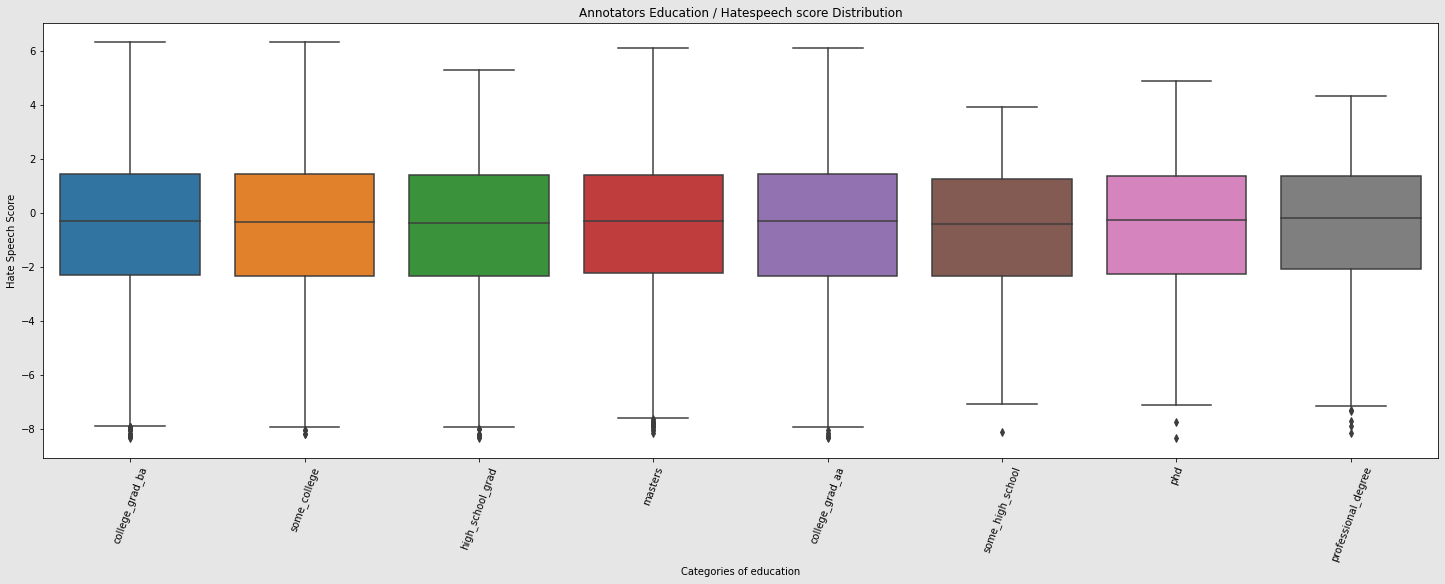

In [ ]:
plt.figure(figsize=(25, 8)).set_facecolor('#E6E6E6')
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['annotator_educ'], y=berkeley_df['hate_speech_score'])
# Name axis labels
plt.xlabel("Categories of education")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Annotators Education / Hatespeech score Distribution')


## Hatespeech & Annotator Age

Text(0.5, 1.0, 'Annotators Age / Hatespeech score Distribution')

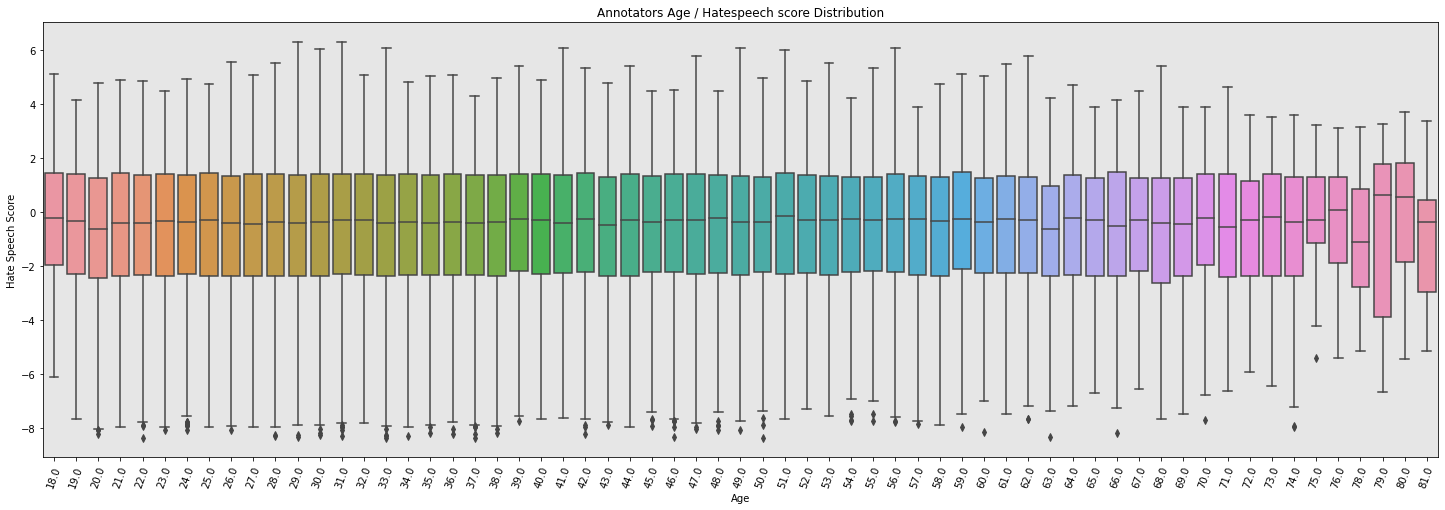

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['annotator_age'], y=berkeley_df['hate_speech_score']).set_facecolor('#E6E6E6')
# Name axis labels
plt.xlabel("Age")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Annotators Age / Hatespeech score Distribution')

<u> **`Main Assumption:`** </u>
   * No significant deviations appear to exist related to the hatespeech scores and the different anottators' ages. However, annotators that can be characterized as quite old seem to give higher values in terms of hate.

## Hatespeech & Target seniors Age

Text(0.5, 1.0, 'Seniors / Hatespeech score Distribution')

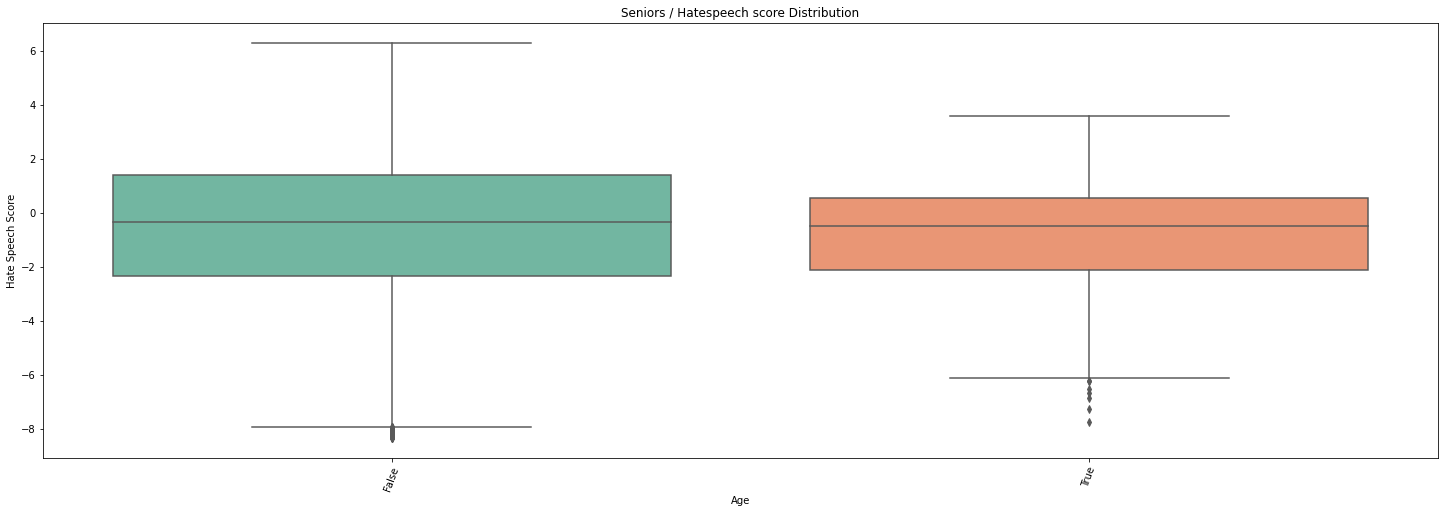

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_age_seniors'], y=berkeley_df['hate_speech_score'], palette="Set2")
# Name axis labels
plt.xlabel("Age")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Seniors / Hatespeech score Distribution')

## Hatespeech & Target young adults Age

Text(0.5, 1.0, 'Young Adults / Hatespeech score Distribution')

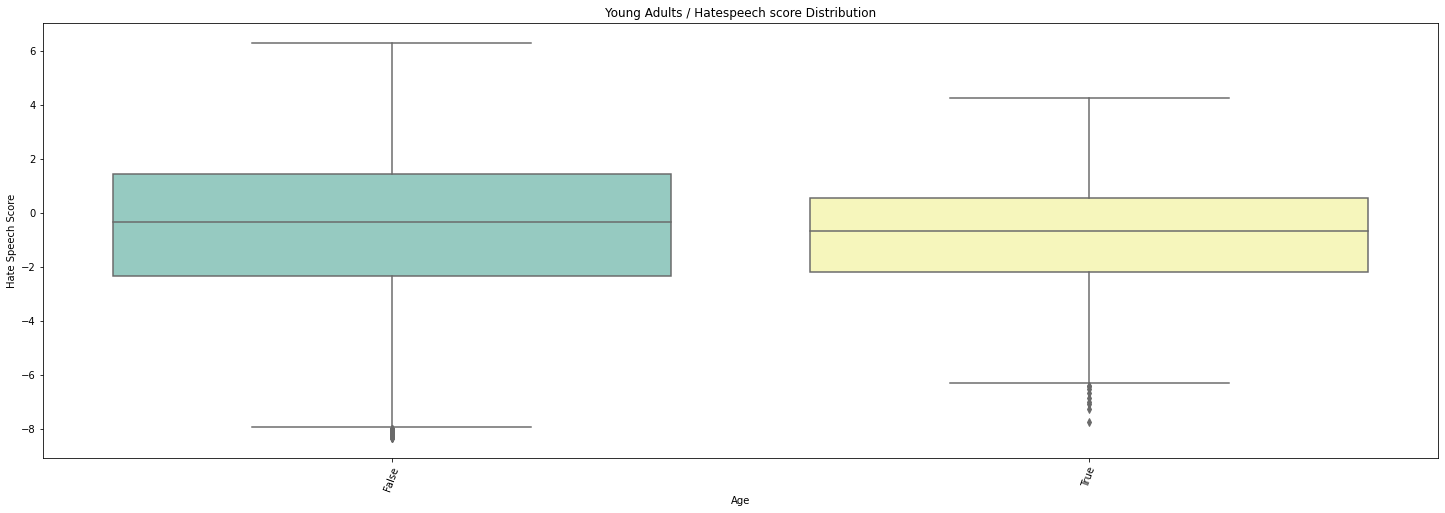

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_age_young_adults'], y=berkeley_df['hate_speech_score'],  palette="Set3")
# Name axis labels
plt.xlabel("Age")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Young Adults / Hatespeech score Distribution')

## Hatespeech & target_age_children

Text(0.5, 1.0, 'Children / Hatespeech score Distribution')

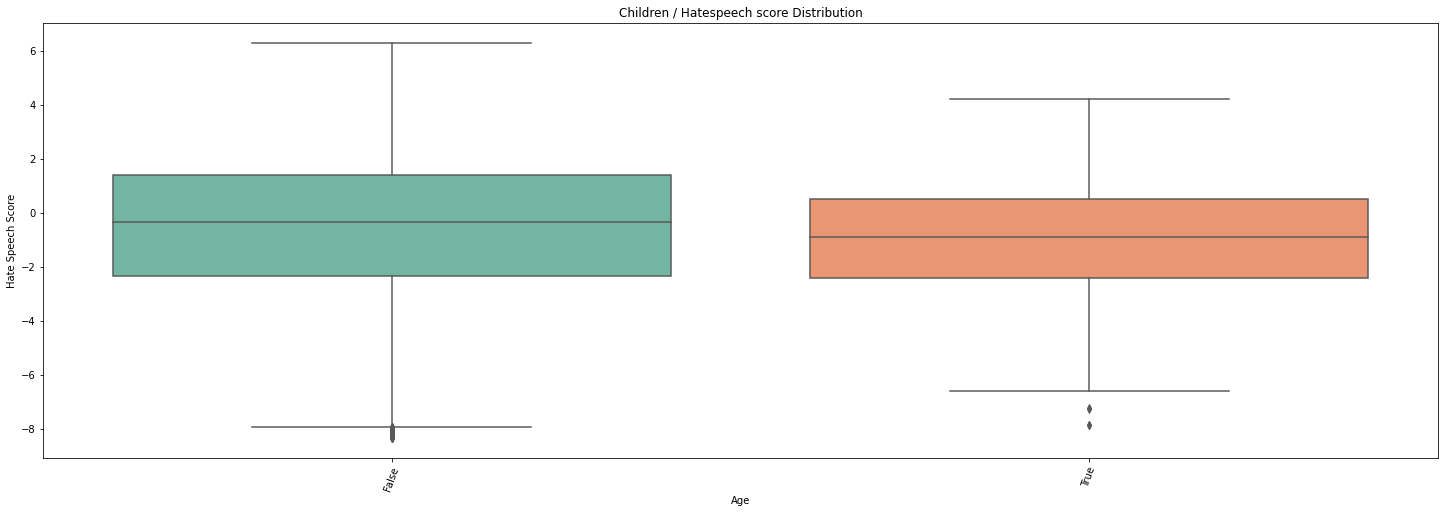

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_age_children'], y=berkeley_df['hate_speech_score'], palette="Set2")
# Name axis labels
plt.xlabel("Age")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Children / Hatespeech score Distribution')

## Hatespeech & target_age_teenagers

Text(0.5, 1.0, 'Teenagers / Hatespeech score Distribution')

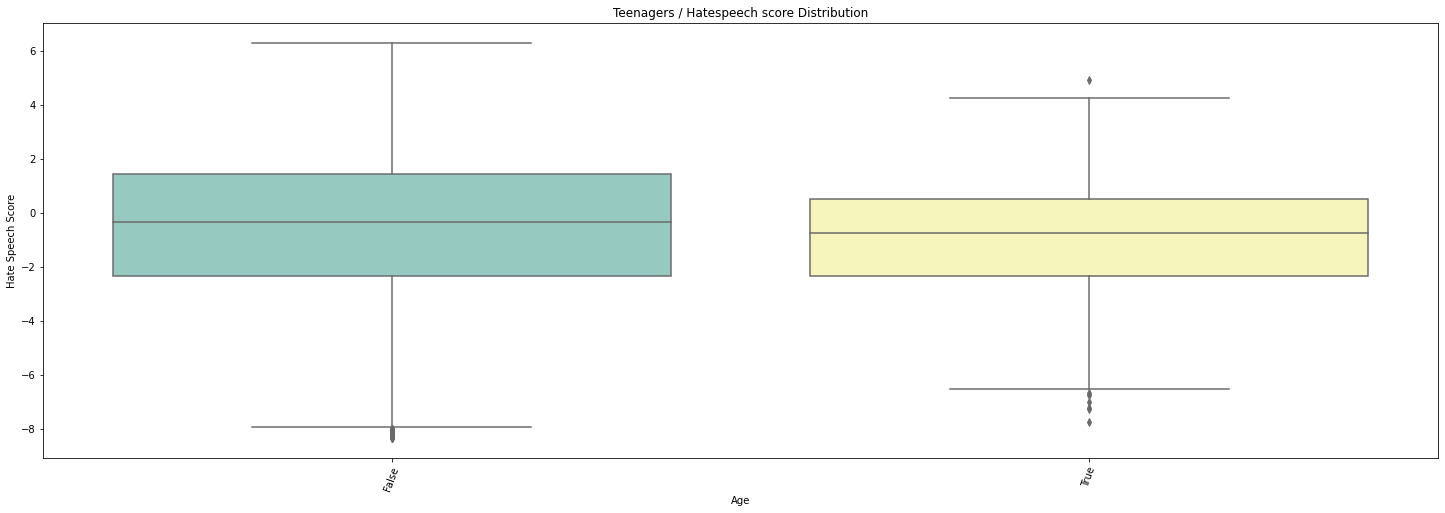

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_age_teenagers'], y=berkeley_df['hate_speech_score'], palette="Set3")
# Name axis labels
plt.xlabel("Age")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Teenagers / Hatespeech score Distribution')

## Hatespeech & target_age_middle_aged

Text(0.5, 1.0, 'Middle Age / Hatespeech score Distribution')

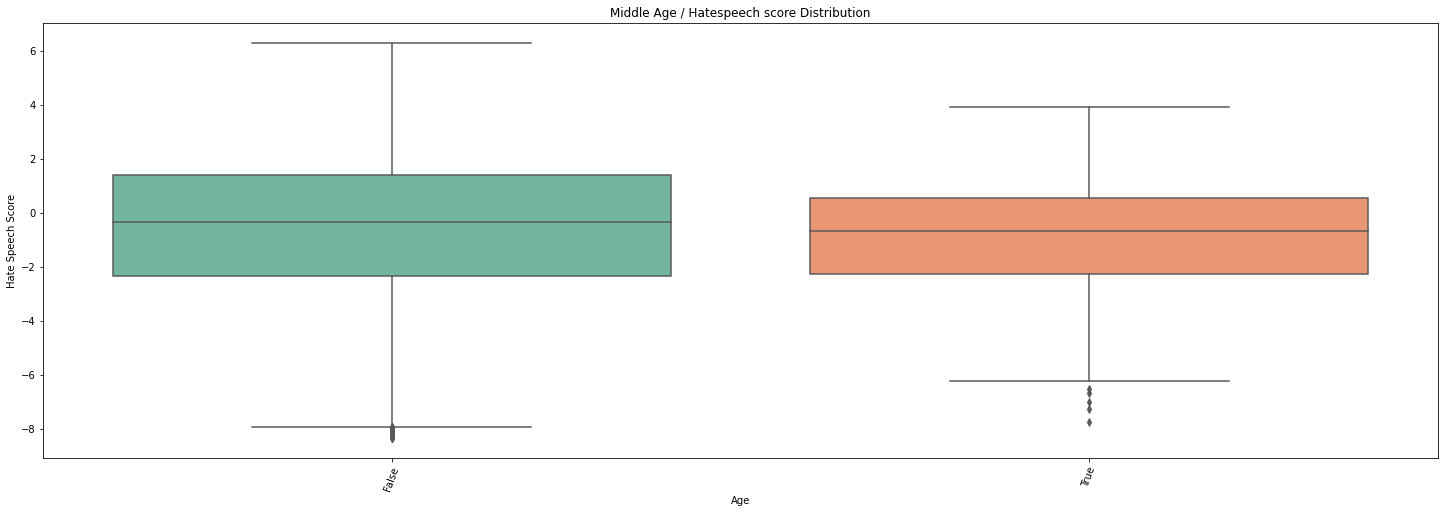

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_age_middle_aged'], y=berkeley_df['hate_speech_score'], palette="Set2")
# Name axis labels
plt.xlabel("Age")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Middle Age / Hatespeech score Distribution')

##  Hatespeech & target_age_other

Text(0.5, 1.0, 'Unknown / Hatespeech score Distribution')

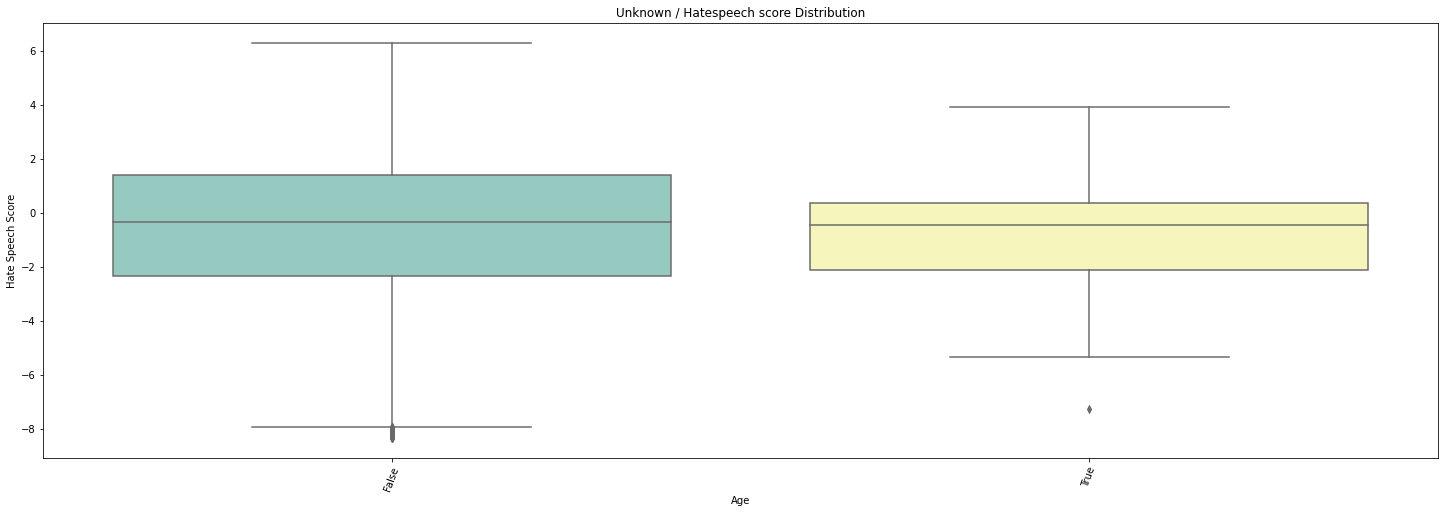

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_age_other'], y=berkeley_df['hate_speech_score'], palette="Set3")
# Name axis labels
plt.xlabel("Age")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Unknown / Hatespeech score Distribution')

##  Hatespeech & target_race_asian

Text(0.5, 1.0, 'Asian / Hatespeech score Distribution')

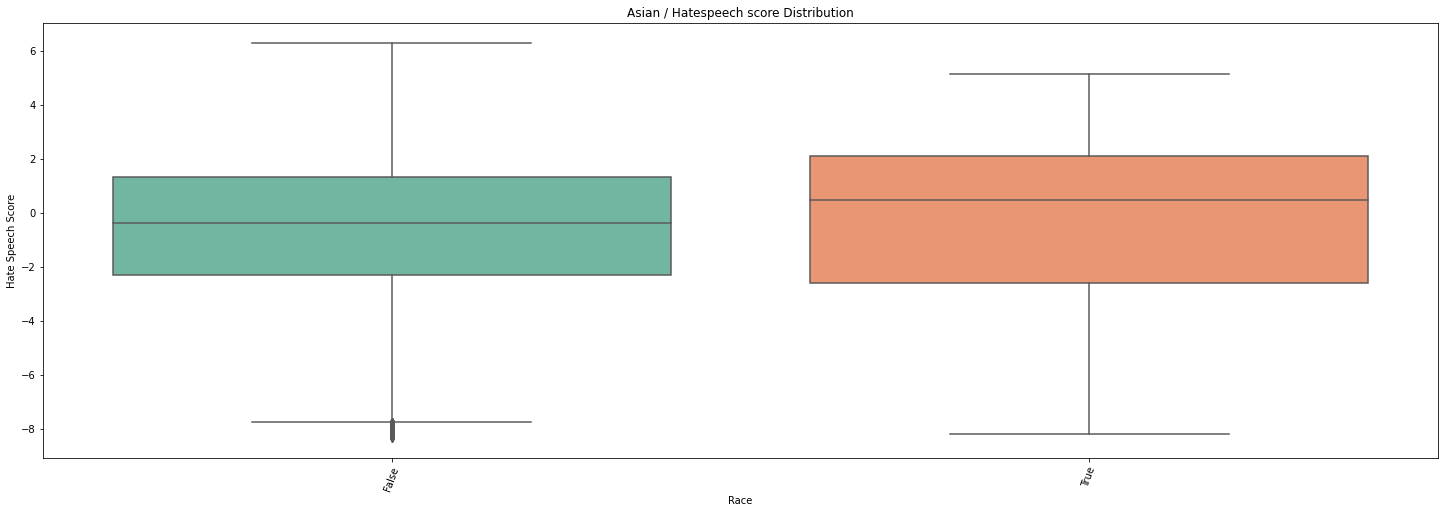

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_race_asian'], y=berkeley_df['hate_speech_score'], palette="Set2")
# Name axis labels
plt.xlabel("Race")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Asian / Hatespeech score Distribution')

##  Hatespeech & target_race_black

Text(0.5, 1.0, 'Black / Hatespeech score Distribution')

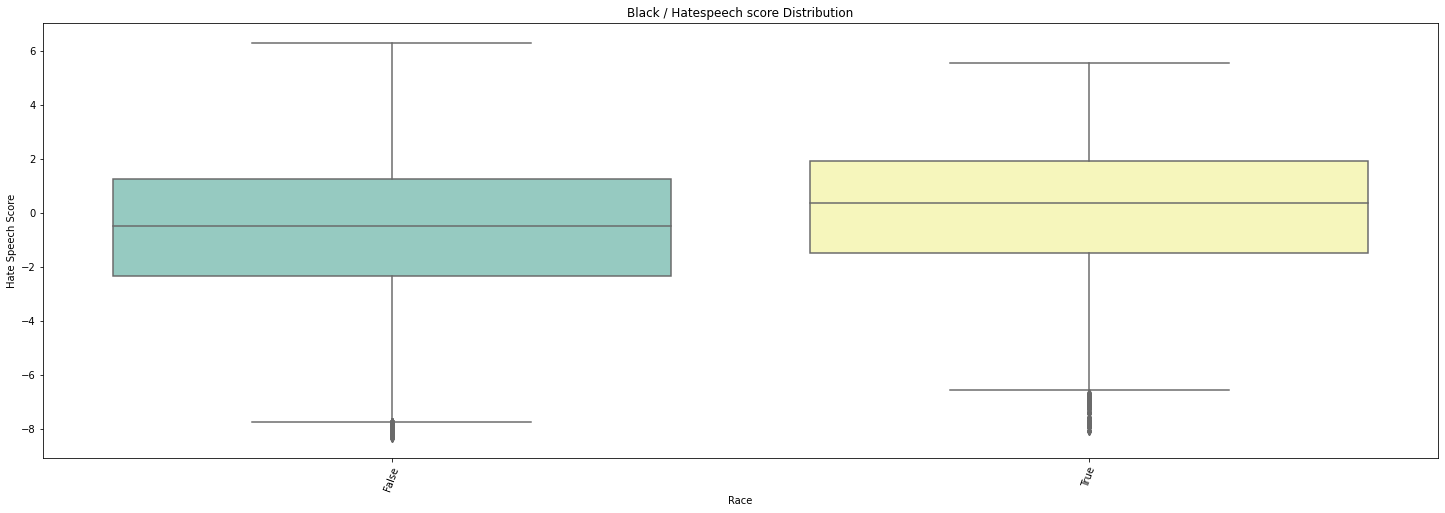

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_race_black'], y=berkeley_df['hate_speech_score'], palette="Set3")
# Name axis labels
plt.xlabel("Race")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Black / Hatespeech score Distribution')

##  Hatespeech & target_race_latinx

Text(0.5, 1.0, 'Latinx / Hatespeech score Distribution')

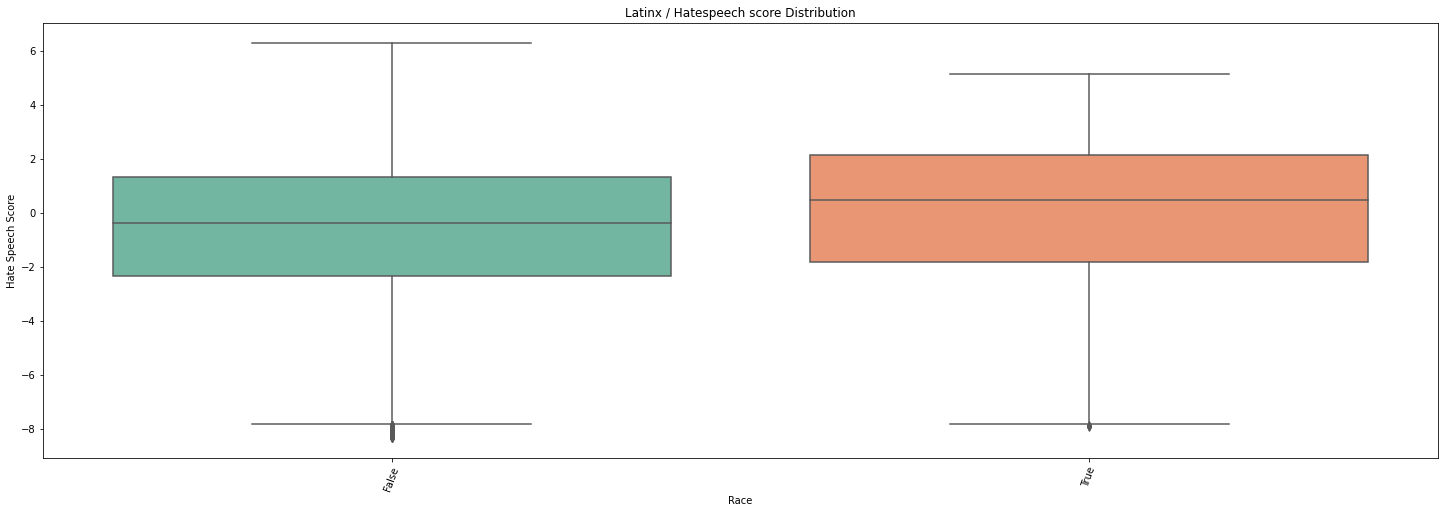

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_race_latinx'], y=berkeley_df['hate_speech_score'], palette="Set2")
# Name axis labels
plt.xlabel("Race")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Latinx / Hatespeech score Distribution')

##  Hatespeech & target_race_middle_eastern

Text(0.5, 1.0, 'Middle Eastern / Hatespeech score Distribution')

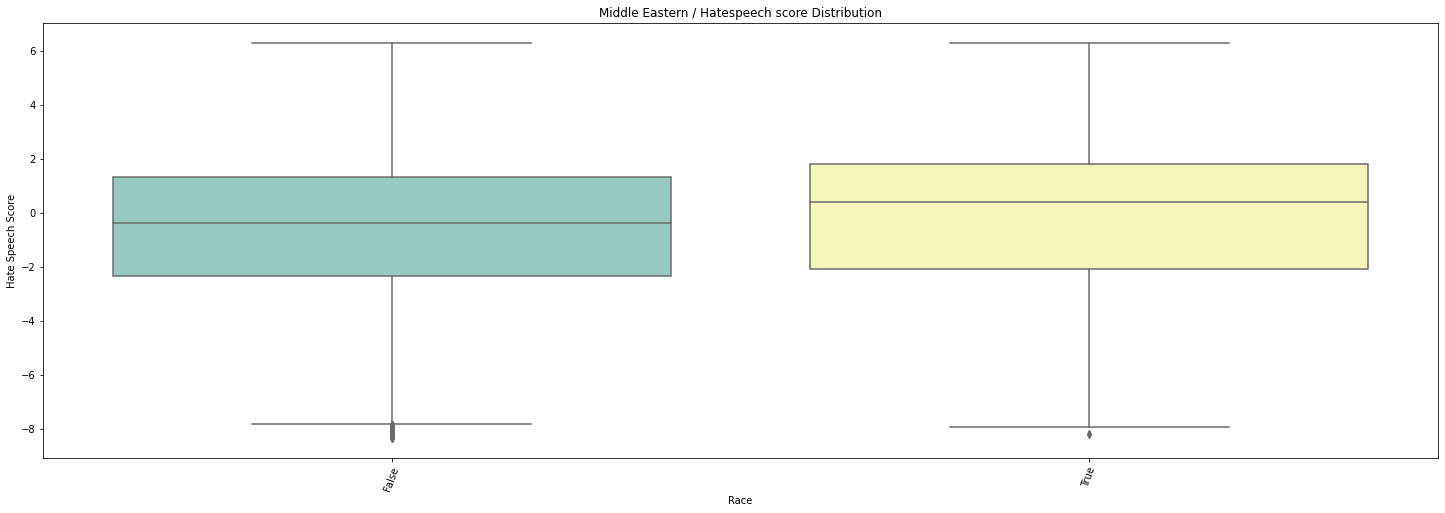

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_race_middle_eastern'], y=berkeley_df['hate_speech_score'], palette="Set3")
# Name axis labels
plt.xlabel("Race")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Middle Eastern / Hatespeech score Distribution')

##  Hatespeech & target_race_native_american

Text(0.5, 1.0, 'Native American / Hatespeech score Distribution')

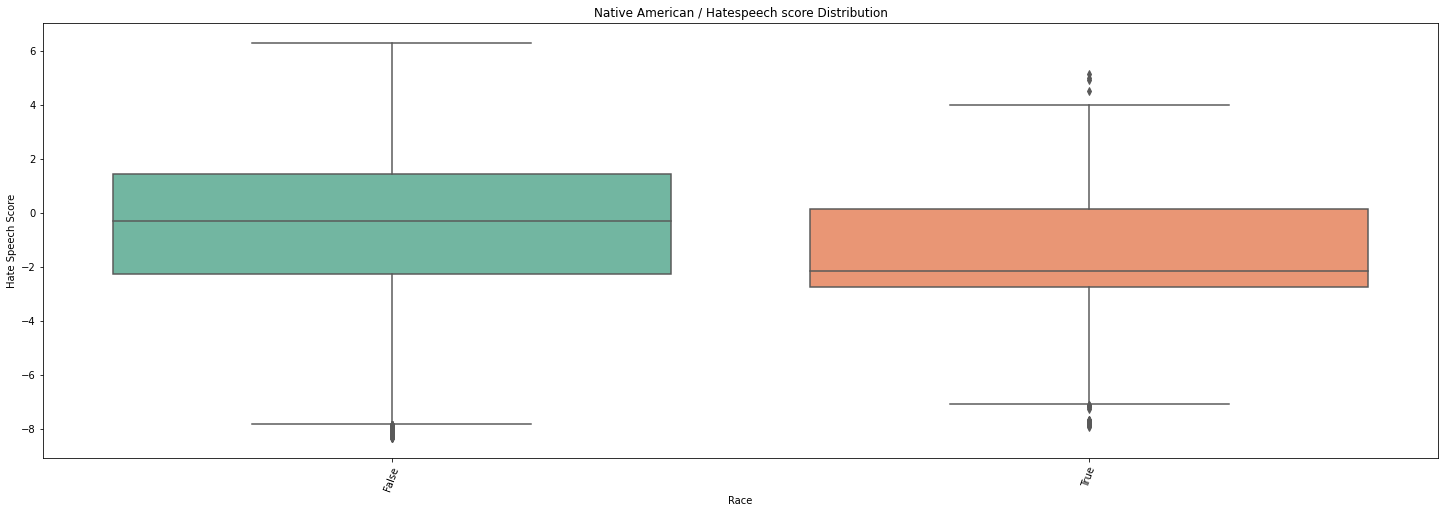

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_race_native_american'], y=berkeley_df['hate_speech_score'], palette="Set2")
# Name axis labels
plt.xlabel("Race")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Native American / Hatespeech score Distribution')

##  Hatespeech & target_race_pacific_islander

Text(0.5, 1.0, 'Pacific Islanders / Hatespeech score Distribution')

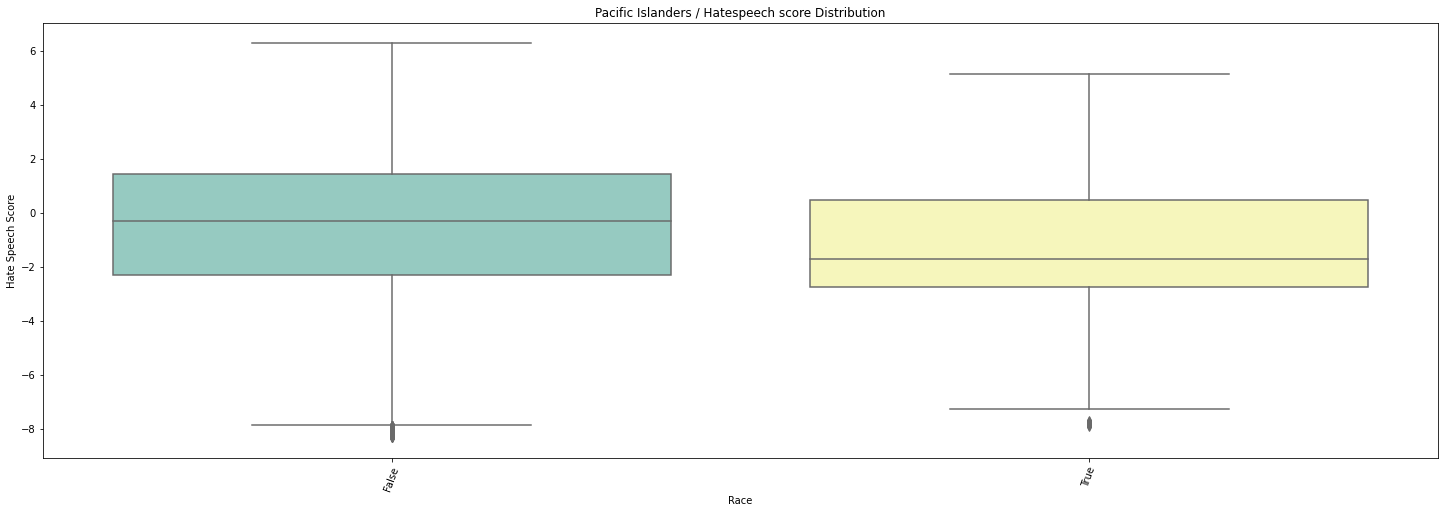

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_race_pacific_islander'], y=berkeley_df['hate_speech_score'], palette="Set3")
# Name axis labels
plt.xlabel("Race")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Pacific Islanders / Hatespeech score Distribution')

##  Hatespeech & target_race_white

Text(0.5, 1.0, 'White / Hatespeech score Distribution')

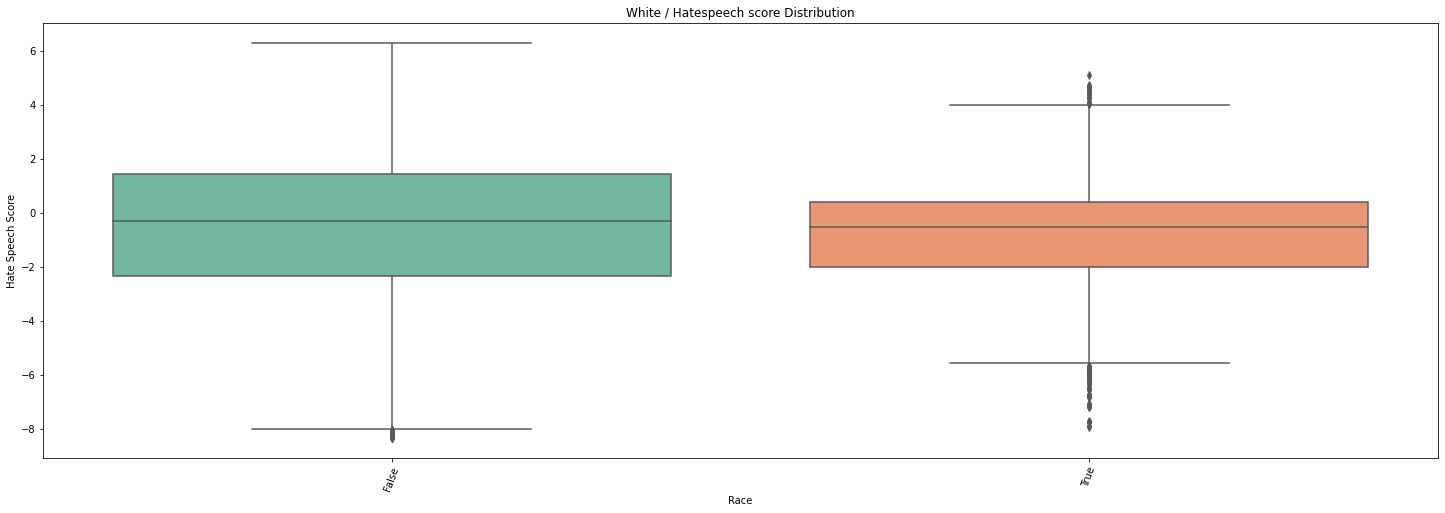

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_race_white'], y=berkeley_df['hate_speech_score'], palette="Set2")
# Name axis labels
plt.xlabel("Race")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('White / Hatespeech score Distribution')

##  Hatespeech & target_race_other

Text(0.5, 1.0, 'Unknown race / Hatespeech score Distribution')

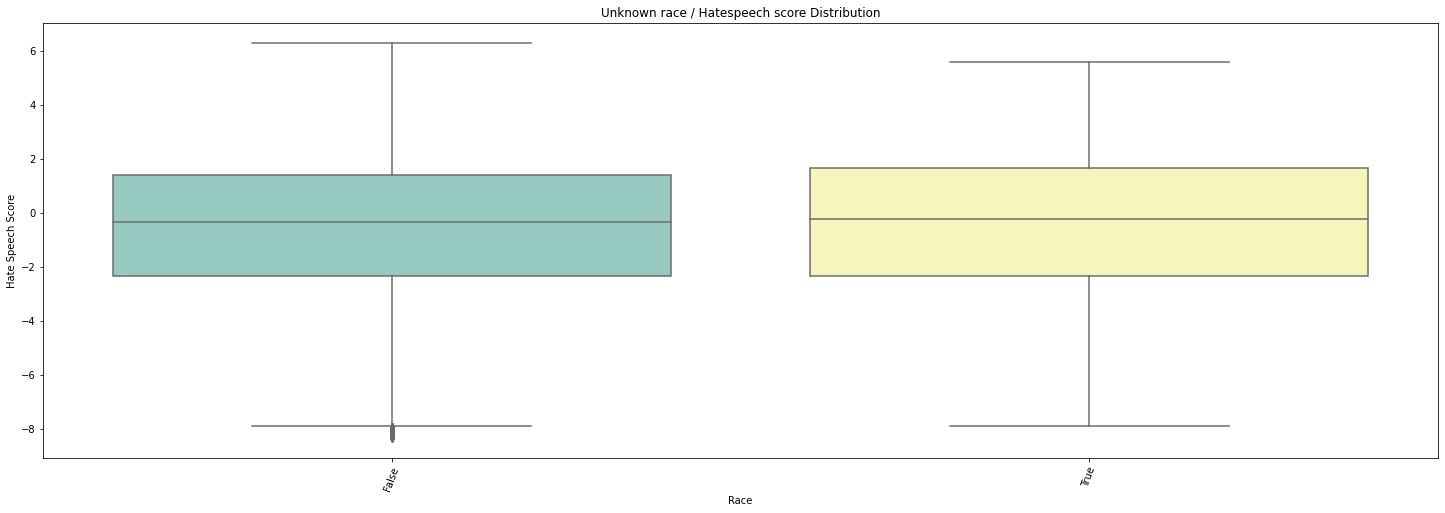

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_race_other'], y=berkeley_df['hate_speech_score'], palette="Set3")
# Name axis labels
plt.xlabel("Race")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Unknown race / Hatespeech score Distribution')

##  Hatespeech & target_religion_atheist

Text(0.5, 1.0, 'Atheist / Hatespeech score Distribution')

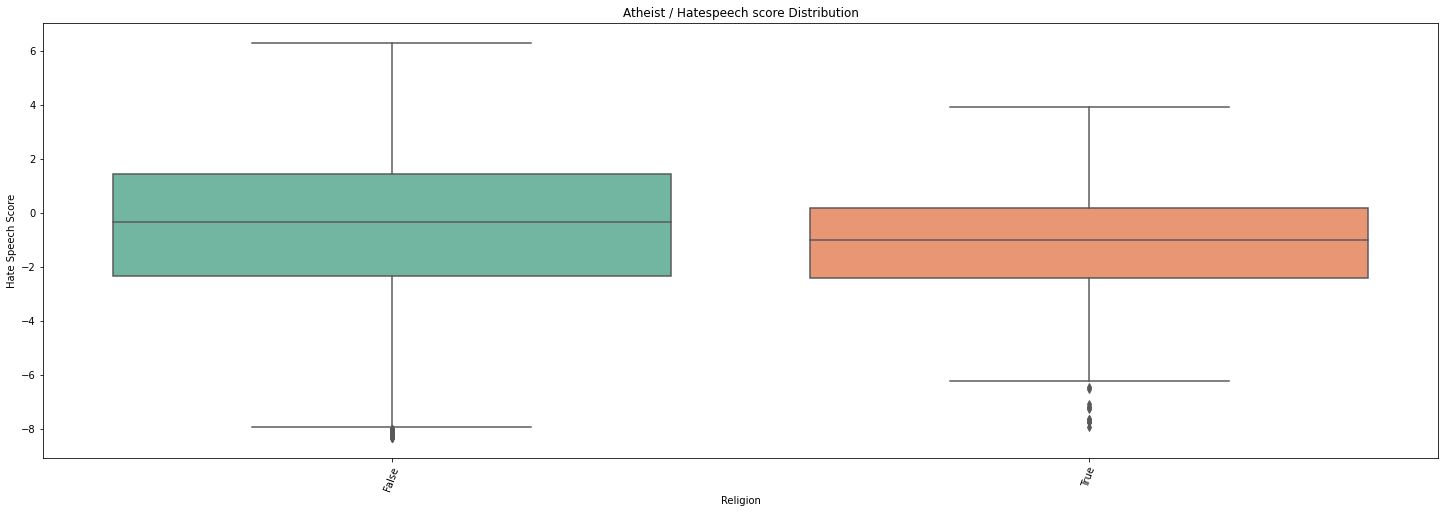

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_religion_atheist'], y=berkeley_df['hate_speech_score'], palette="Set2")
# Name axis labels
plt.xlabel("Religion")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Atheist / Hatespeech score Distribution')

##  Hatespeech & target_religion_buddhist

Text(0.5, 1.0, 'Buddhist / Hatespeech score Distribution')

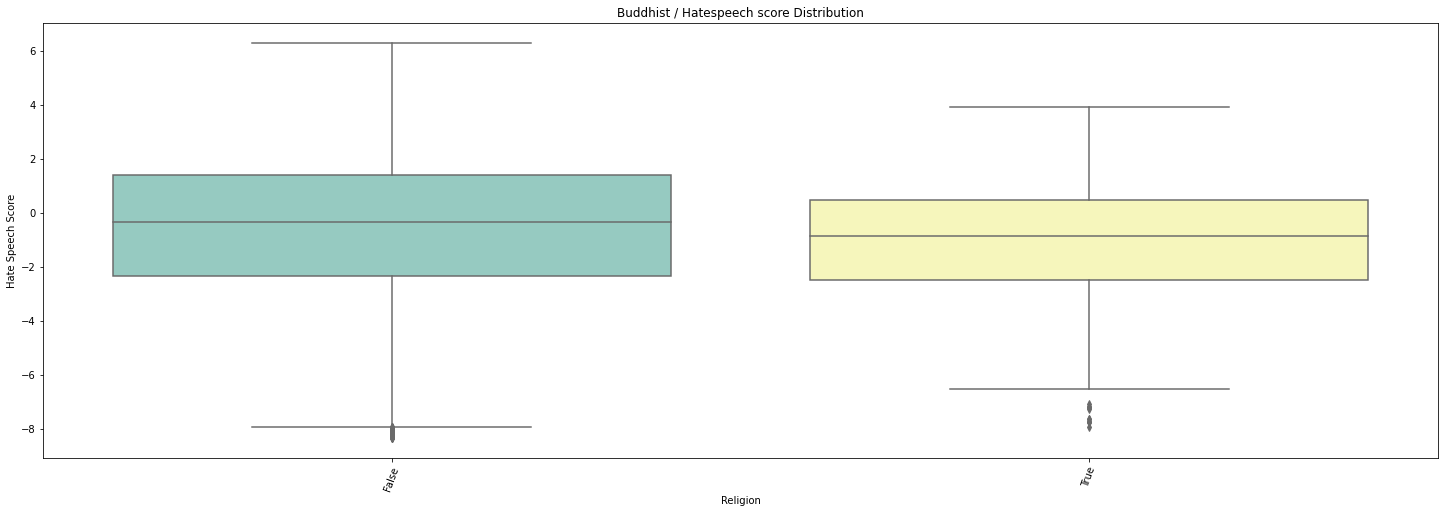

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_religion_buddhist'], y=berkeley_df['hate_speech_score'], palette="Set3")
# Name axis labels
plt.xlabel("Religion")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Buddhist / Hatespeech score Distribution')

##  Hatespeech & target_religion_christian

Text(0.5, 1.0, 'Christian / Hatespeech score Distribution')

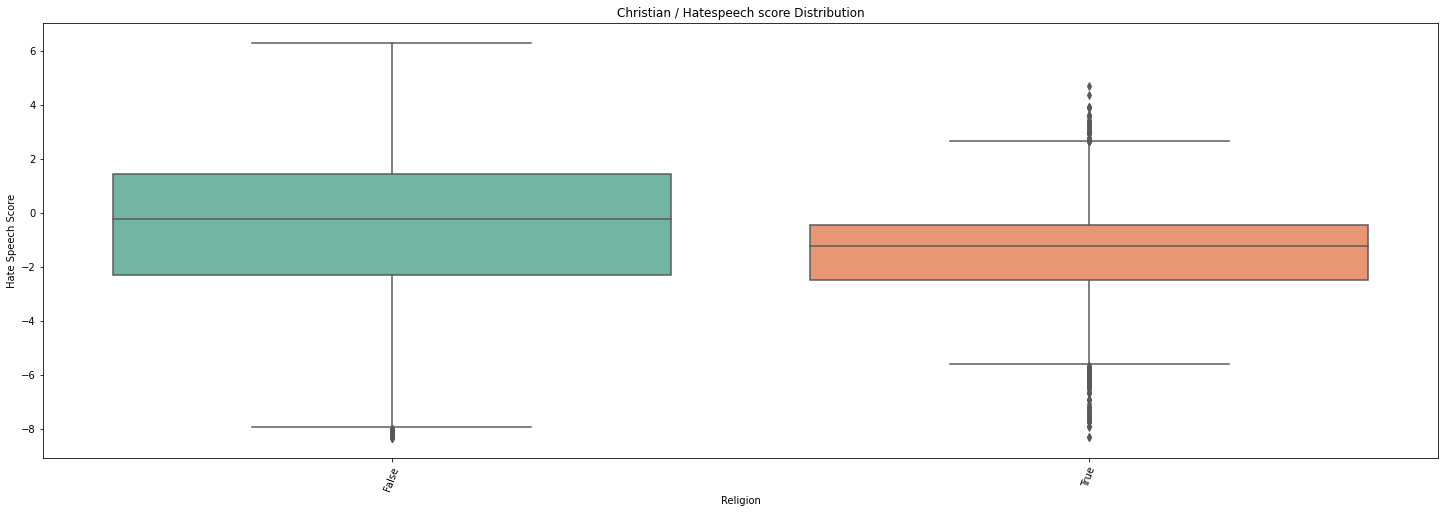

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_religion_christian'], y=berkeley_df['hate_speech_score'], palette="Set2")
# Name axis labels
plt.xlabel("Religion")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Christian / Hatespeech score Distribution')

##  Hatespeech & target_religion_hindu

Text(0.5, 1.0, 'Hindu / Hatespeech score Distribution')

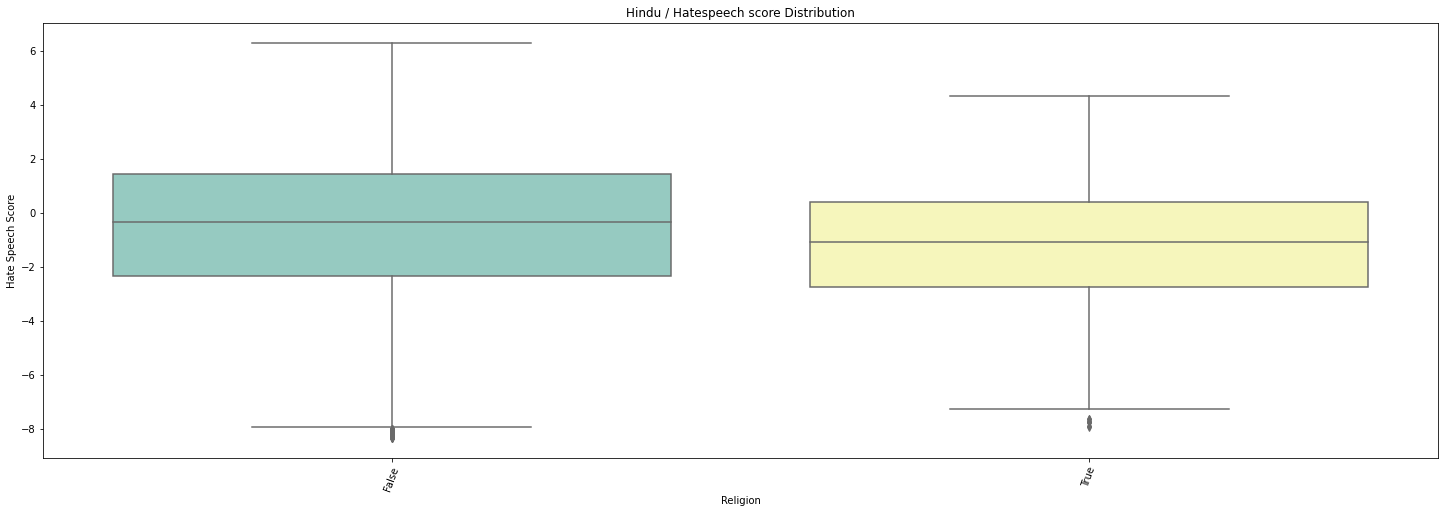

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_religion_hindu'], y=berkeley_df['hate_speech_score'], palette="Set3")
# Name axis labels
plt.xlabel("Religion")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Hindu / Hatespeech score Distribution')

##  Hatespeech & target_religion_jewish

Text(0.5, 1.0, 'Jewish / Hatespeech score Distribution')

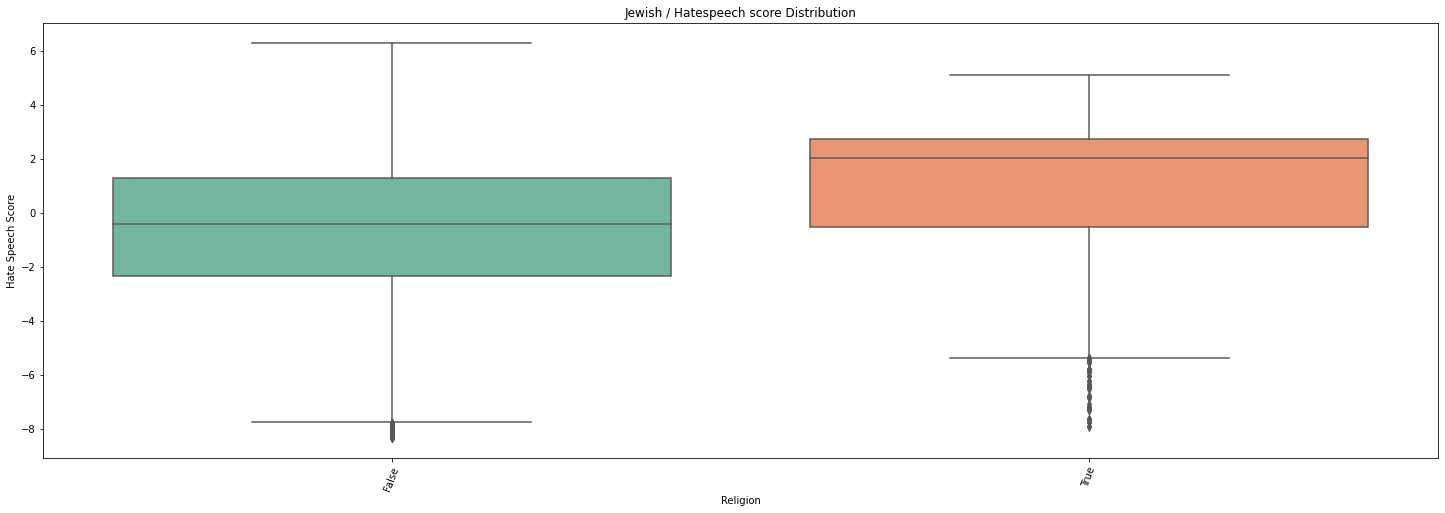

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_religion_jewish'], y=berkeley_df['hate_speech_score'], palette="Set2")
# Name axis labels
plt.xlabel("Religion")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Jewish / Hatespeech score Distribution')

##  Hatespeech & target_religion_mormon

Text(0.5, 1.0, 'Mormon / Hatespeech score Distribution')

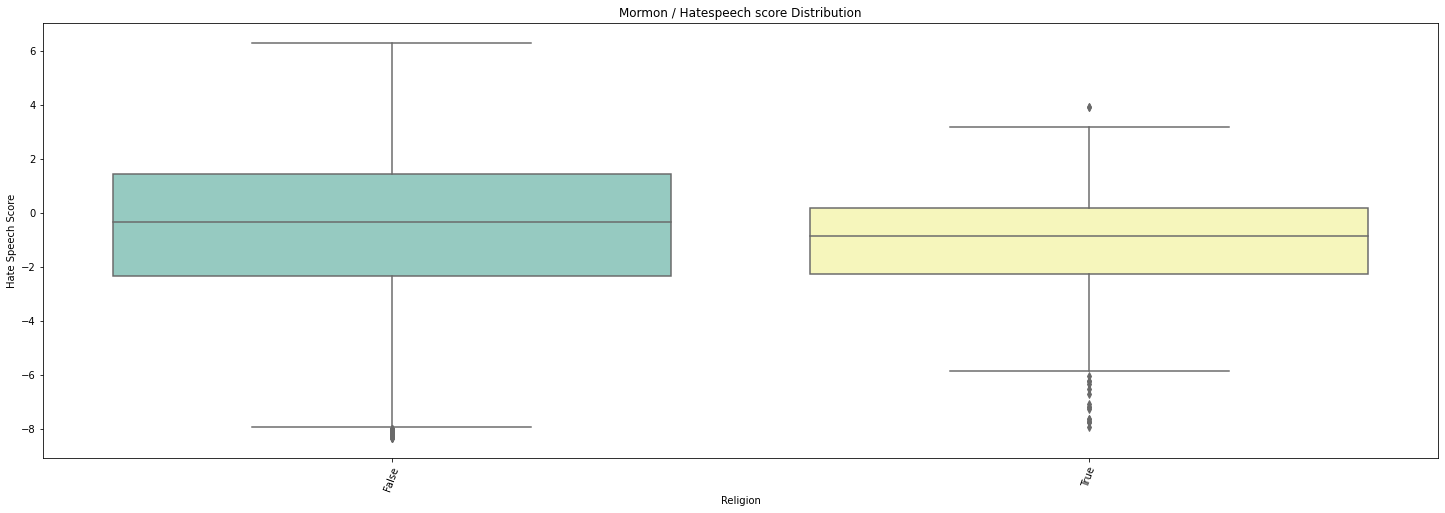

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_religion_mormon'], y=berkeley_df['hate_speech_score'], palette="Set3")
# Name axis labels
plt.xlabel("Religion")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Mormon / Hatespeech score Distribution')

##  Hatespeech & target_religion_muslim

Text(0.5, 1.0, 'Muslim / Hatespeech score Distribution')

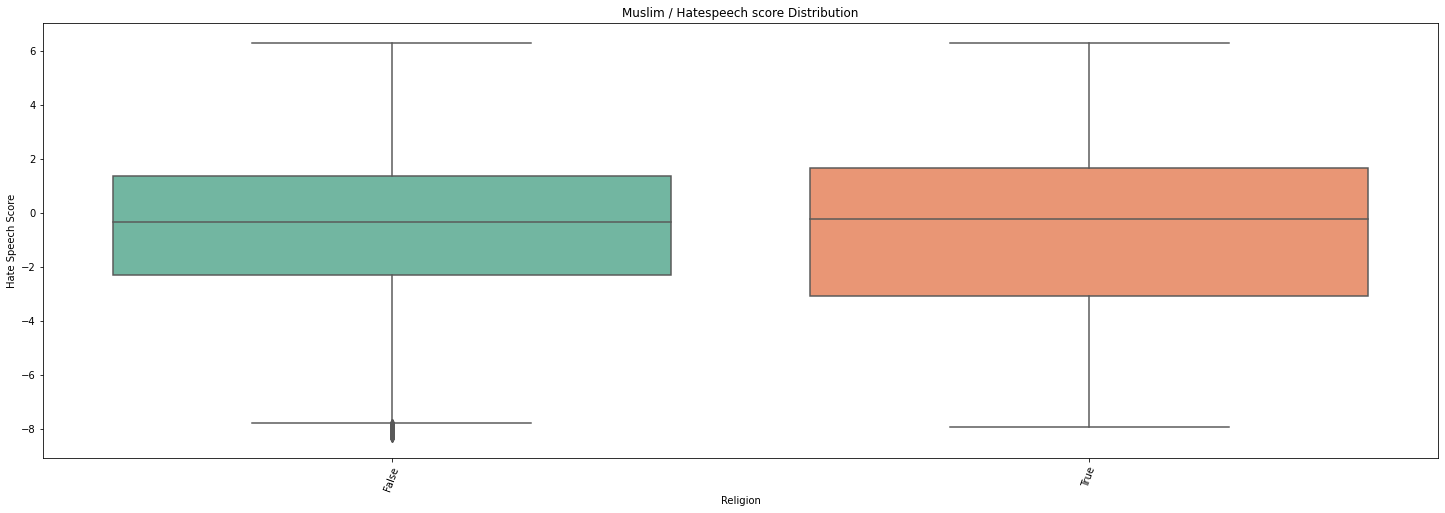

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_religion_muslim'], y=berkeley_df['hate_speech_score'], palette="Set2")
# Name axis labels
plt.xlabel("Religion")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Muslim / Hatespeech score Distribution')

##  Hatespeech & target_religion_other

Text(0.5, 1.0, 'Unknown / Hatespeech score Distribution')

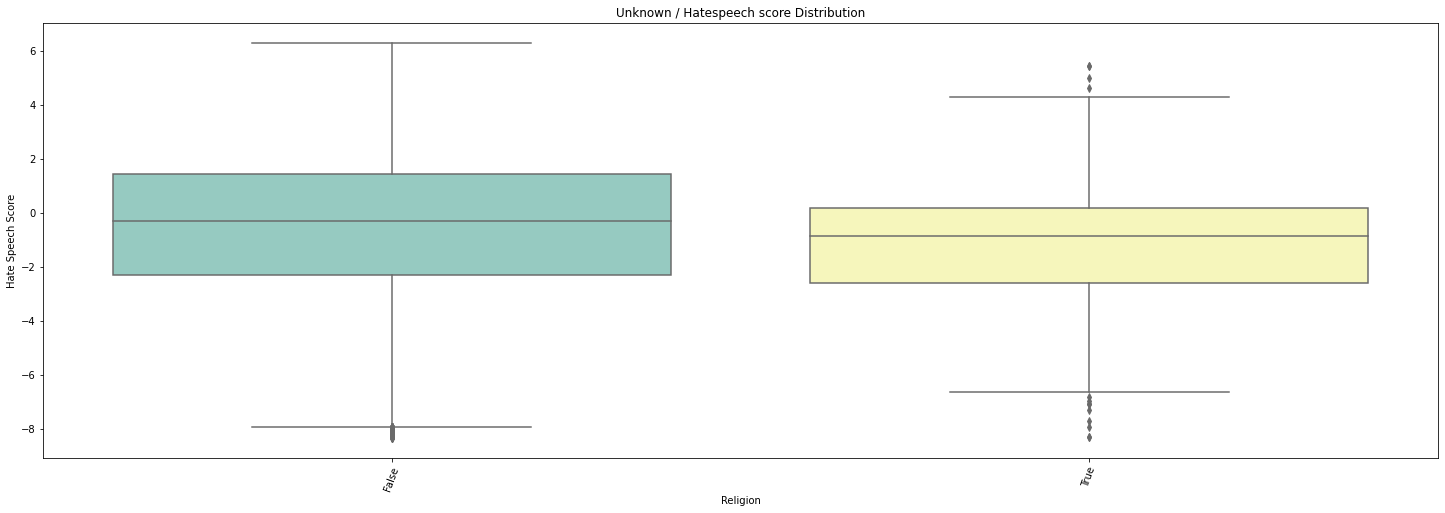

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_religion_other'], y=berkeley_df['hate_speech_score'], palette="Set3")
# Name axis labels
plt.xlabel("Religion")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Unknown / Hatespeech score Distribution')

##  Hatespeech & target_origin_immigrant

Text(0.5, 1.0, 'Immigrant / Hatespeech score Distribution')

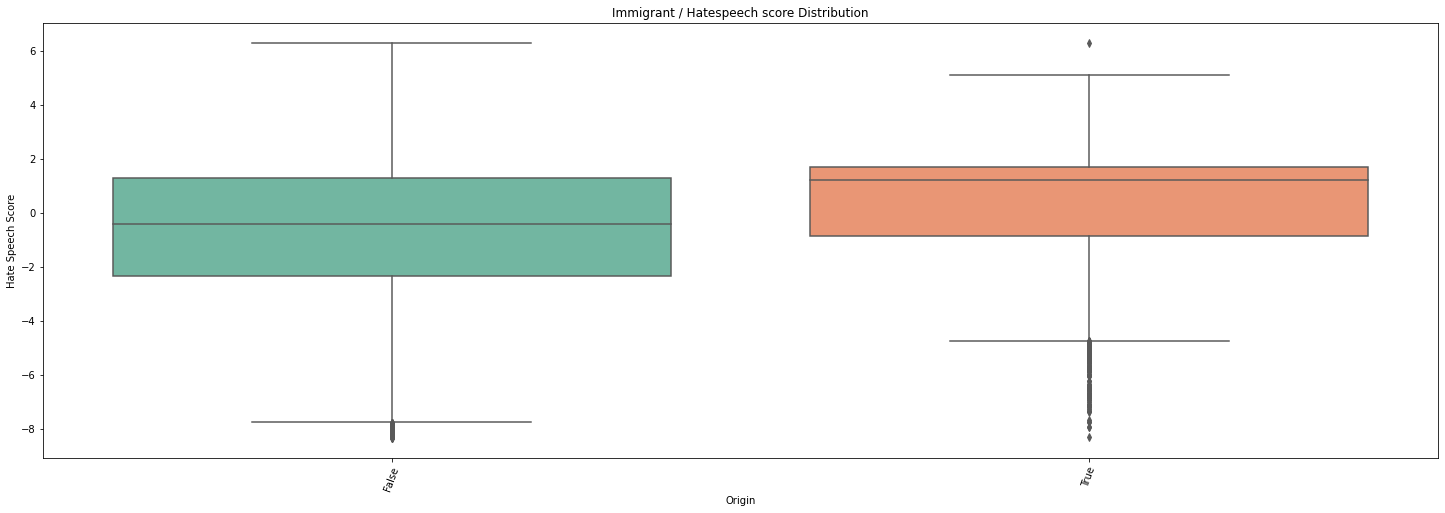

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_origin_immigrant'], y=berkeley_df['hate_speech_score'], palette="Set2")
# Name axis labels
plt.xlabel("Origin")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Immigrant / Hatespeech score Distribution')

##  Hatespeech & target_origin_migrant_worker

Text(0.5, 1.0, 'Migrant worker / Hatespeech score Distribution')

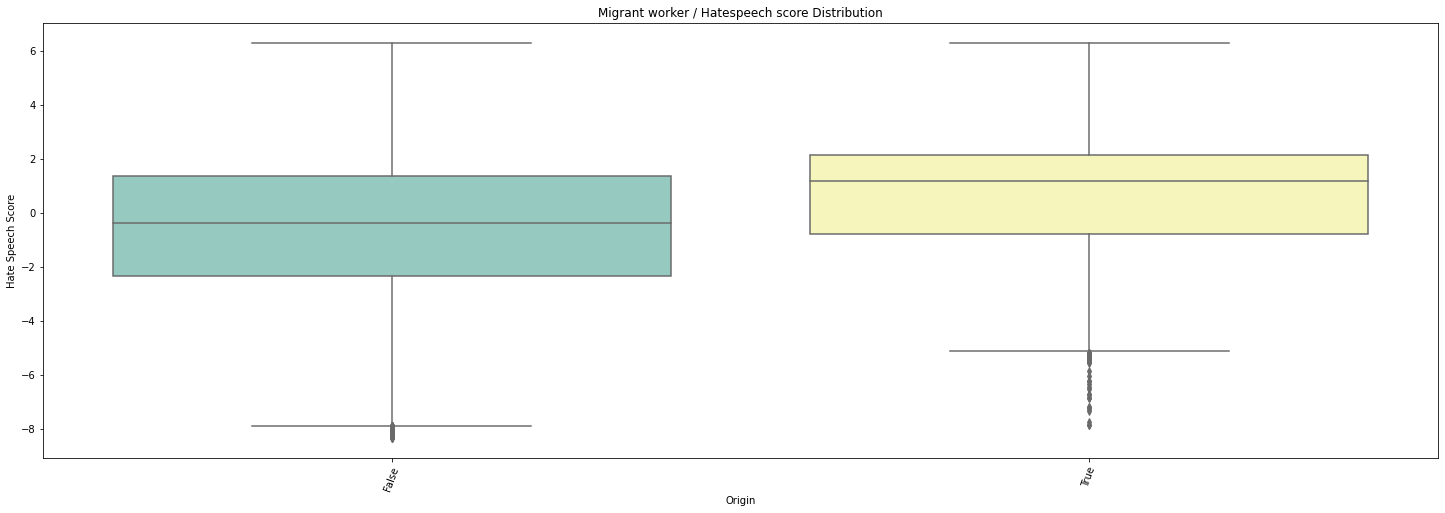

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_origin_migrant_worker'], y=berkeley_df['hate_speech_score'], palette="Set3")
# Name axis labels
plt.xlabel("Origin")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Migrant worker / Hatespeech score Distribution')

##  Hatespeech & target_origin_specific_country

Text(0.5, 1.0, 'Based on specific country / Hatespeech score Distribution')

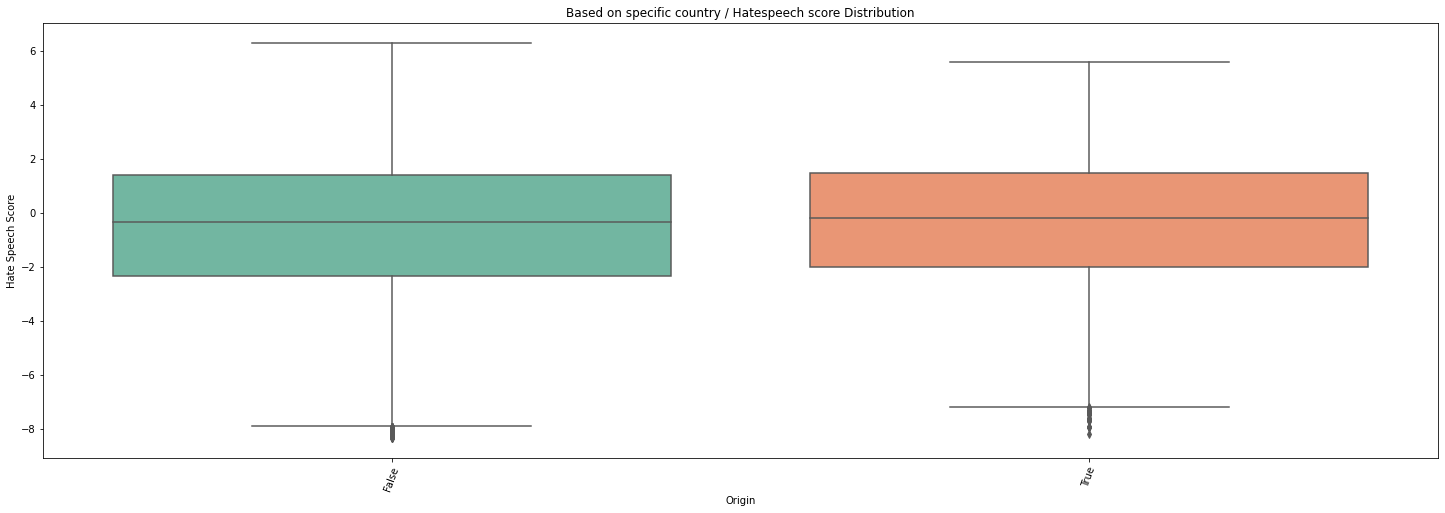

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_origin_specific_country'], y=berkeley_df['hate_speech_score'], palette="Set2")
# Name axis labels
plt.xlabel("Origin")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Based on specific country / Hatespeech score Distribution')

##  Hatespeech & target_origin_undocumented

Text(0.5, 1.0, 'Undocumented / Hatespeech score Distribution')

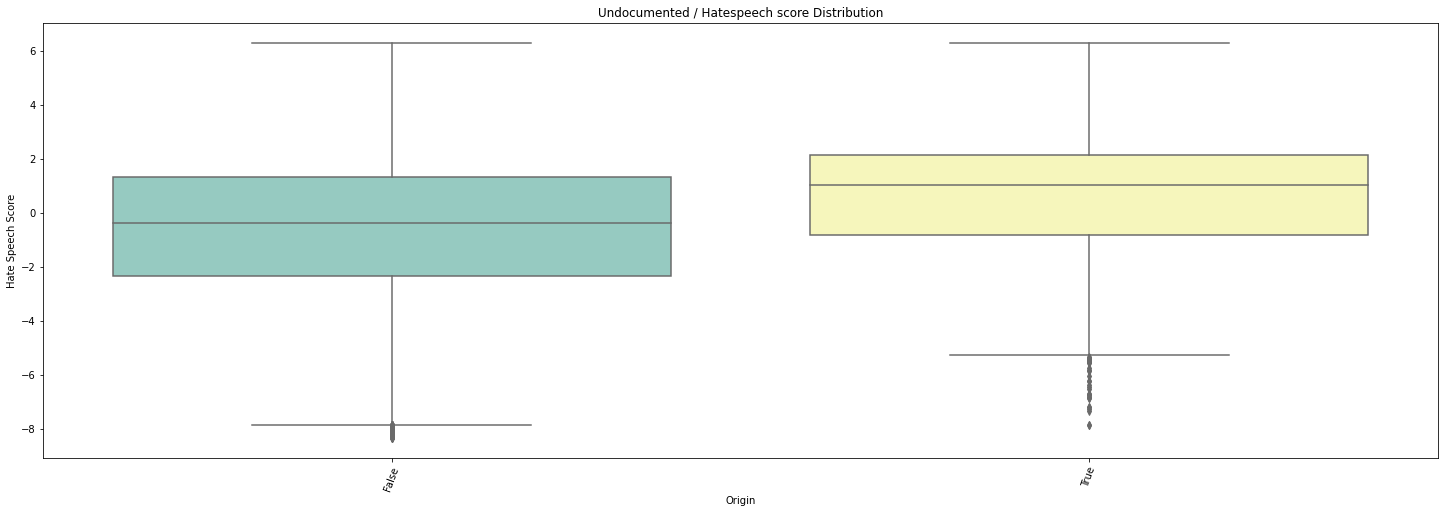

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_origin_undocumented'], y=berkeley_df['hate_speech_score'], palette="Set3")
# Name axis labels
plt.xlabel("Origin")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Undocumented / Hatespeech score Distribution')

##  Hatespeech & target_origin_other

Text(0.5, 1.0, 'Unknown / Hatespeech score Distribution')

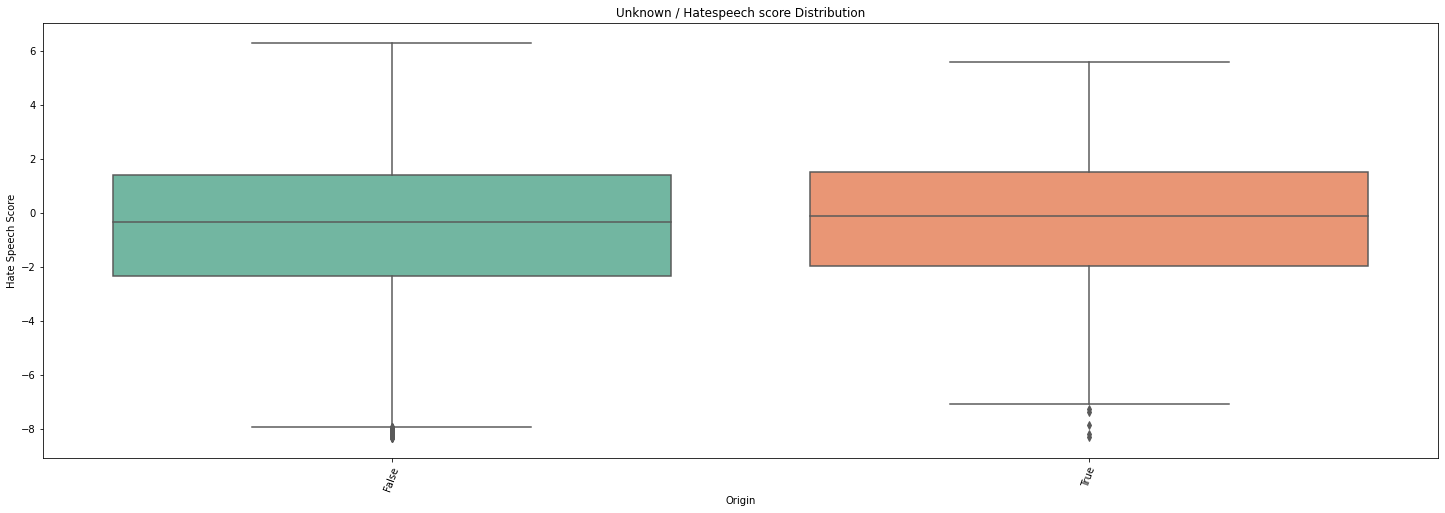

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_origin_other'], y=berkeley_df['hate_speech_score'], palette="Set2")
# Name axis labels
plt.xlabel("Origin")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Unknown / Hatespeech score Distribution')

##  Hatespeech & target_gender_men

Text(0.5, 1.0, 'Men / Hatespeech score Distribution')

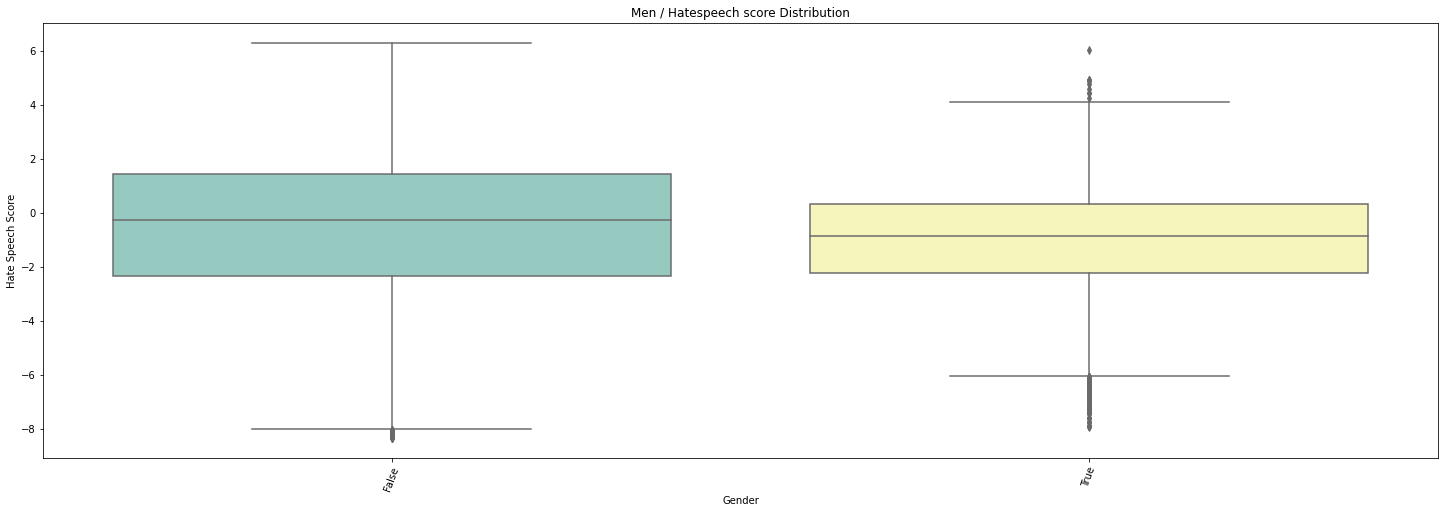

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_gender_men'], y=berkeley_df['hate_speech_score'], palette="Set3")
# Name axis labels
plt.xlabel("Gender")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Men / Hatespeech score Distribution')

##  Hatespeech & target_gender_women

Text(0.5, 1.0, 'Women / Hatespeech score Distribution')

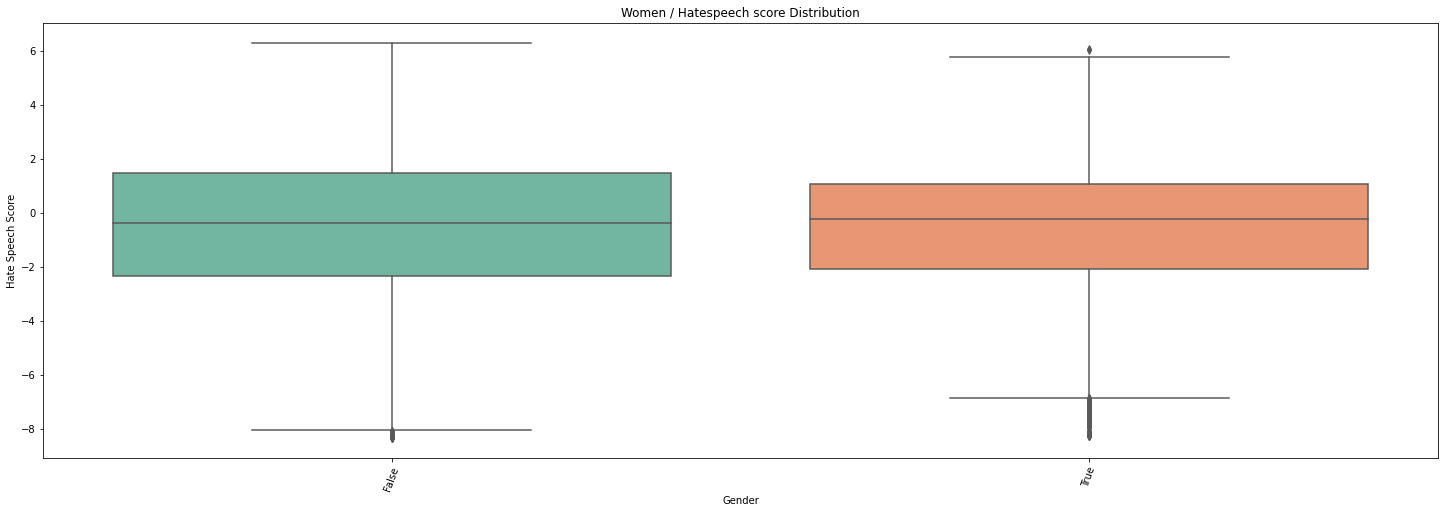

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['target_gender_women'], y=berkeley_df['hate_speech_score'], palette="Set2")
# Name axis labels
plt.xlabel("Gender")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Women / Hatespeech score Distribution')

<u> **`Main Assumption:`** </u>
   * While no extreme deviations exist in terms of hatespeech and the above groups/ sub-groups, what can be concluded is that race, religion & origin can connected to hateful comments, especially regarding specific sub-groups.

##  Hatespeech & annotator_gender

In [ ]:
Nominal= berkeley_df[['annotator_gender']].value_counts().to_frame('count')
Nominal

,count
annotator_gender,
female,76370
male,57582
non-binary,985
prefer_not_to_say,500
self-describe,119


In [ ]:
Nominal['percentage']= round((Nominal['count']/Nominal['count'].sum())*100,2)
Nominal

,count,percentage
annotator_gender,,
female,76370,56.34
male,57582,42.48
non-binary,985,0.73
prefer_not_to_say,500,0.37
self-describe,119,0.09


<u> **`Assumption:`** </u>
   * Mainly women are occupied to label the comments for Berkeley research

Text(0.5, 1.0, 'Annotators Gender / Hatespeech score Distribution')

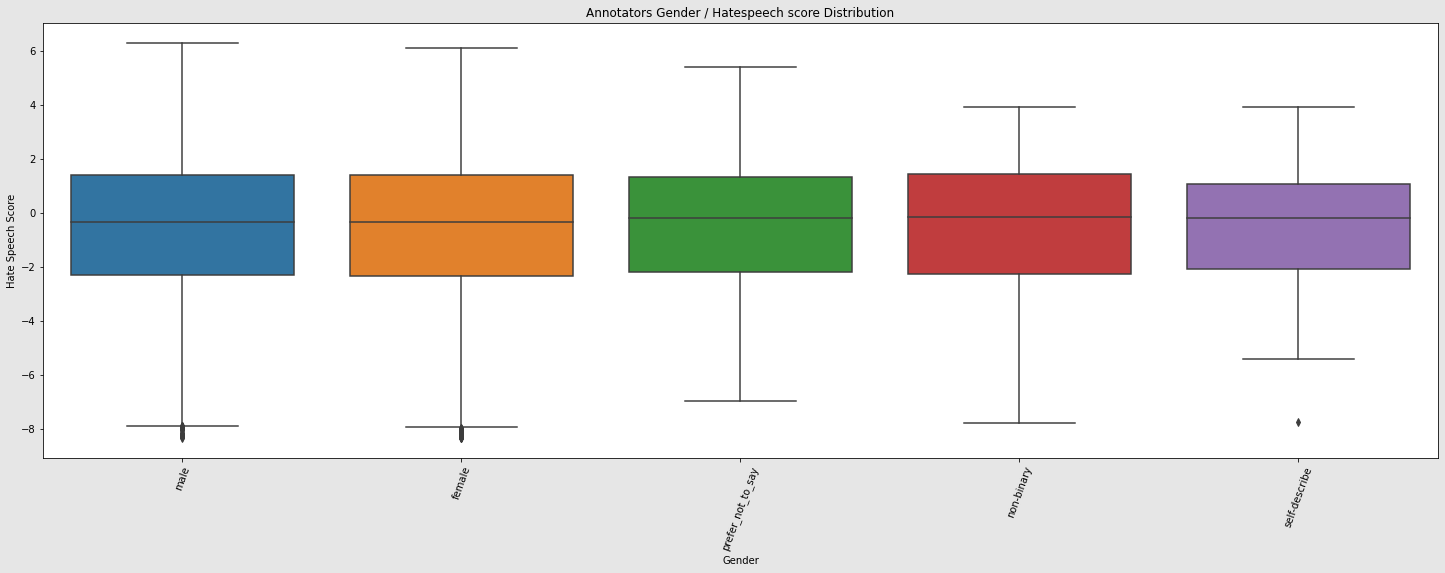

In [ ]:
plt.figure(figsize=(25, 8)).set_facecolor('#E6E6E6')
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['annotator_gender'], y=berkeley_df['hate_speech_score'])
# Name axis labels
plt.xlabel("Gender")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Annotators Gender / Hatespeech score Distribution')

##  Hatespeech & annotator_income

In [ ]:
Nominal1= berkeley_df[['annotator_income']].value_counts().to_frame('count')
Nominal1

,count
annotator_income,
10k-50k,56668
50k-100k,52803
100k-200k,17415
<10k,6429
>200k,2138


In [ ]:
Nominal1['percentage']= round((Nominal1['count']/Nominal1['count'].sum())*100,2)
Nominal1

,count,percentage
annotator_income,,
10k-50k,56668,41.84
50k-100k,52803,38.98
100k-200k,17415,12.86
<10k,6429,4.75
>200k,2138,1.58


<u> **`Assumption:`** </u>
   * Most annotators can be considered wealthy or with no economical issues

Text(0.5, 1.0, 'Income / Hatespeech score Distribution')

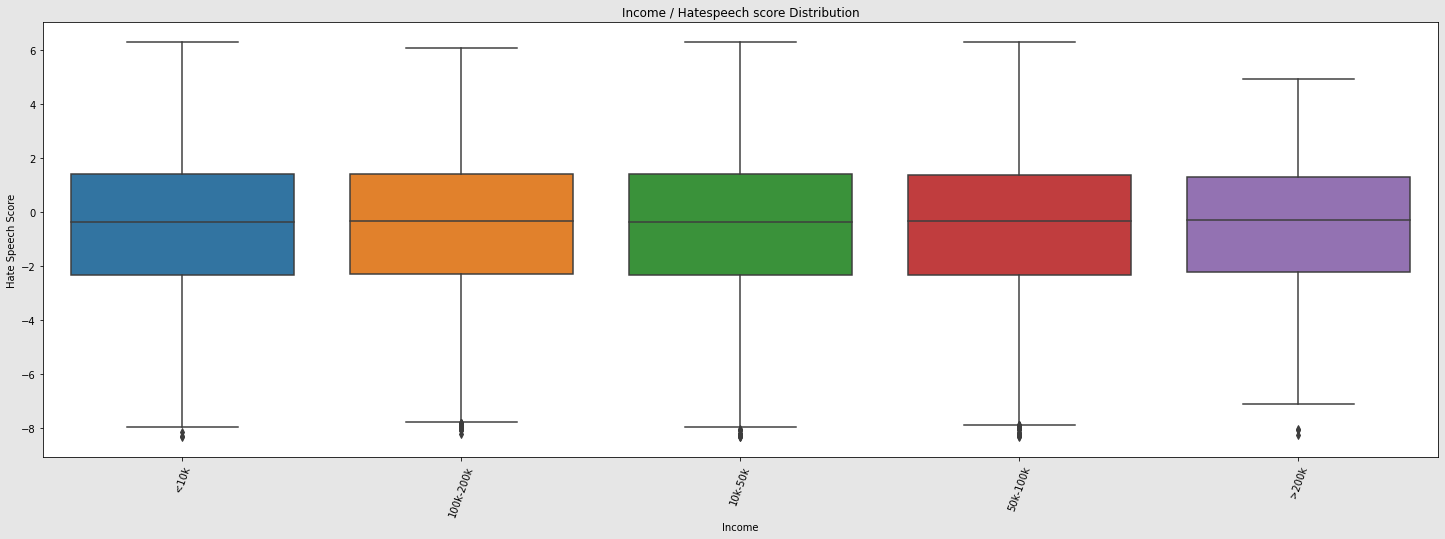

In [ ]:
plt.figure(figsize=(25, 8)).set_facecolor('#E6E6E6')
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['annotator_income'], y=berkeley_df['hate_speech_score'])
# Name axis labels
plt.xlabel("Income")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Income / Hatespeech score Distribution')

##  Hatespeech & annotator_ideology

In [ ]:
Nominal2= berkeley_df[['annotator_ideology']].value_counts().to_frame('count')
Nominal2

,count
annotator_ideology,
liberal,33812
neutral,23112
slightly_liberal,21333
extremely_liberal,17944
conservative,15628
slightly_conservative,15101
extremely_conservative,4544
no_opinion,4055


In [ ]:
Nominal2['percentage']= round((Nominal2['count']/Nominal2['count'].sum())*100,2)
Nominal2

,count,percentage
annotator_ideology,,
liberal,33812,24.95
neutral,23112,17.05
slightly_liberal,21333,15.74
extremely_liberal,17944,13.24
conservative,15628,11.53
slightly_conservative,15101,11.14
extremely_conservative,4544,3.35
no_opinion,4055,2.99


<u> **`Assumption:`** </u>
   * Their political beliefs tend to liberal while there none a few with any political affiliation 

Text(0.5, 1.0, 'Ideology / Hatespeech score Distribution')

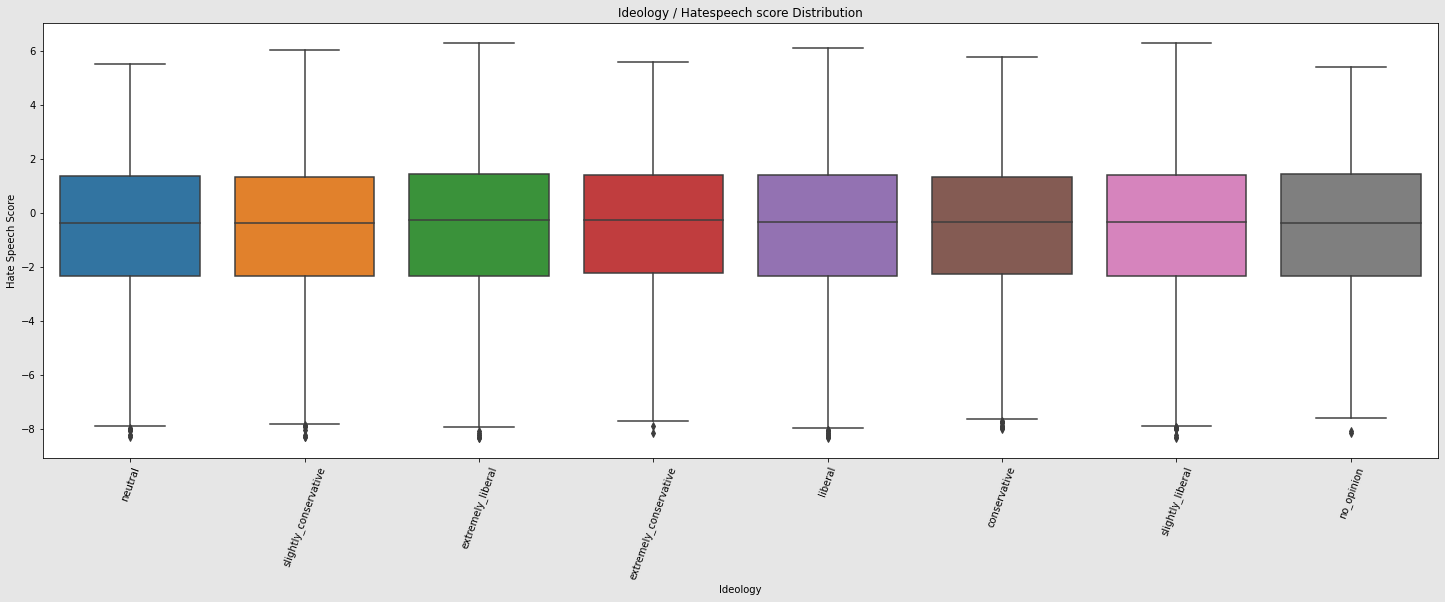

In [ ]:
plt.figure(figsize=(25, 8)).set_facecolor('#E6E6E6')
plt.xticks(rotation=70)
sns.boxplot(x=berkeley_df['annotator_ideology'], y=berkeley_df['hate_speech_score'])
# Name axis labels
plt.xlabel("Ideology")
plt.ylabel("Hate Speech Score")
# Add title
plt.title('Ideology / Hatespeech score Distribution')

## Annotator Severity

It refers to annotator's estimated survey interpretation bias.

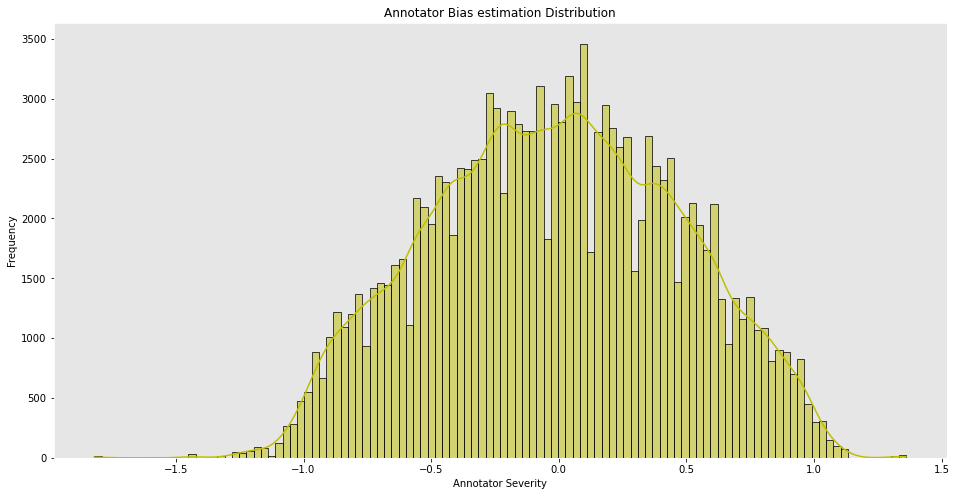

In [ ]:
fig, ax = plt.subplots(figsize = (16, 8))
# Use a gray background
ax.set_facecolor('#E6E6E6')
sns.histplot(x='annotator_severity', data=berkeley_df, kde=True, color='y')
# Add title
plt.title('Annotator Bias estimation Distribution')
# Spine color of figure
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
# Name axis labels
plt.xlabel("Annotator Severity")
plt.ylabel("Frequency")
plt.show()

<u> **`Assumption:`** </u>
   * In most cases bias cannot be fully detected to annotators work, however there are cases where it exists.

## Negative values

In [ ]:
Numericdf = berkeley_df.select_dtypes(include=np.number)

(Numericdf < 0).sum()

comment_id                0
annotator_id              0
platform                  0
sentiment                 0
respect                   0
insult                    0
humiliate                 0
status                    0
dehumanize                0
violence                  0
genocide                  0
attack_defend             0
hatespeech                0
hate_speech_score     74763
infitms                   0
outfitms                  0
annotator_severity    68973
std_err                   0
annotator_infitms         0
annotator_outfitms        0
hypothesis            62104
annotator_age             0
dtype: int64

Negative values exist only in variables where specialists gave scores to sum up their conclusions, such as the hate speech score.